# Scenario 1: We are using as train data the 4 seasons and we are trying to predict the last 2

# **Bundesliga**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\bundesliga.csv")

In [3]:
#We assign a unique value at every team of the league
team_id = {'Bayern Munich':1, 'Dortmund':2, 'Ein Frankfurt':3, 'FC Koln':4,
           'Hannover':5, 'Hertha':6, 'Hoffenheim':7, "M'gladbach":8, 'Paderborn':9,
           'Augsburg':10, 'Hamburg':11, 'Leverkusen':12, 'Schalke 04':13, 'Stuttgart':14,
           'Werder Bremen':15, 'Wolfsburg':16, 'Freiburg':17, 'Mainz':18, 'Darmstadt':19,
           'Ingolstadt':20, 'RB Leipzig':21, 'Fortuna Dusseldorf':22, 'Nurnberg':23,
           'Union Berlin':24}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [4]:
#We are dropping the stats that are not available to us before the game and some features 
#that we used for creating more relevant ones
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD','season',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints', 'AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs','round',
              'HTL', 'ATL', 'ATD', 'ATW','l5_ravg_HTgc', 'l5_ravg_ATgc'],axis=1)

df = df.dropna()

In [5]:
X = df.drop('FTR',axis=1)
y = df['FTR']

In [6]:
X.columns

Index(['HomeTeam', 'AwayTeam', 'AVGH', 'AVGD', 'AVGA', 'HT_wins', 'AT_wins',
       'HT_draws', 'AT_draws', 'HT_losses', 'AT_losses', 'l5_ravg_HTST',
       'l5_ravg_ATST', 'l5_ravg_HTCR', 'l5_ravg_ATCR', 'HToveral', 'AToveral',
       'l5_ravg_HTxG', 'l5_ravg_ATxG', 'l5_ravg_HTxpts', 'l5_ravg_ATxpts',
       'l5_ravg_HTdeep', 'l5_ravg_ATdeep', 'l5_ravg_HTppda', 'l5_ravg_ATppda',
       'l5_htdiff', 'l5_atdiff', 'avgHTP', 'avgATP', 'l5_ravg_HTp',
       'l3_ravg_ATp', 'diff_points', 'diff_ATT', 'diff_MID', 'diff_DEF',
       'diff_OVA'],
      dtype='object')

**We are going to check the performance of the model if we train it using all features.**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

In [8]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
first_model = LogisticRegression(max_iter=9000,multi_class='multinomial')

first_model.fit(scaled_X_train,y_train)
first_model_pred = first_model.predict(scaled_X_test)

In [10]:
confusion_matrix(y_test,first_model_pred)

array([[ 76,   2,  65],
       [ 44,   0,  77],
       [ 49,   3, 201]], dtype=int64)

In [56]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.45      0.53      0.49       143
           D       0.00      0.00      0.00       121
           H       0.59      0.79      0.67       253

    accuracy                           0.54       517
   macro avg       0.35      0.44      0.39       517
weighted avg       0.41      0.54      0.46       517



In [57]:
X.shape

(1566, 36)

**Implementation of RFE to reduce the model complexity.** 

 Clf result : 0.492, +- 0.013 N_features : 5
 Clf result : 0.487, +- 0.016 N_features : 6
 Clf result : 0.484, +- 0.011 N_features : 7
 Clf result : 0.481, +- 0.017 N_features : 8
 Clf result : 0.486, +- 0.011 N_features : 9
 Clf result : 0.493, +- 0.026 N_features : 10
 Clf result : 0.497, +- 0.019 N_features : 11
 Clf result : 0.495, +- 0.020 N_features : 12
 Clf result : 0.494, +- 0.020 N_features : 13
 Clf result : 0.495, +- 0.019 N_features : 14
 Clf result : 0.491, +- 0.021 N_features : 15
 Clf result : 0.499, +- 0.021 N_features : 16
 Clf result : 0.498, +- 0.016 N_features : 17
 Clf result : 0.504, +- 0.012 N_features : 18
 Clf result : 0.505, +- 0.013 N_features : 19
 Clf result : 0.494, +- 0.021 N_features : 20
 Clf result : 0.489, +- 0.018 N_features : 21
 Clf result : 0.493, +- 0.020 N_features : 22
 Clf result : 0.493, +- 0.021 N_features : 23
 Clf result : 0.493, +- 0.022 N_features : 24
 Clf result : 0.492, +- 0.021 N_features : 25
 Clf result : 0.500, +- 0.014 N_feature

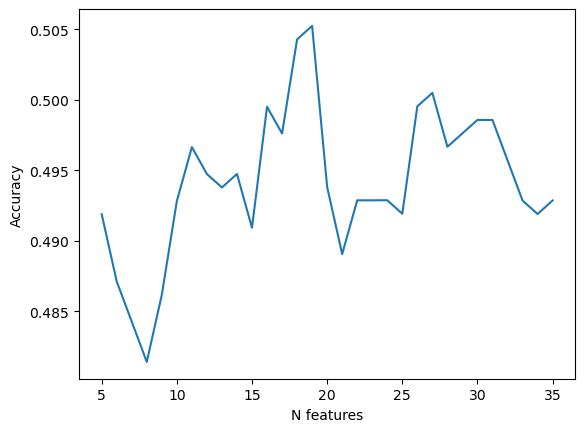

In [58]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.33)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()


In [59]:
#selection of features that provide the best accuracy 
rfe = RFE(estimator =first_model, n_features_to_select = 19, step=1)
rfe.fit(X, y)

#assigning of feature to a list
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()



RFE(estimator=LogisticRegression(max_iter=9000, multi_class='multinomial'),
    n_features_to_select=19)

In [62]:
featured_columns

['AVGH',
 'AVGD',
 'AVGA',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_htdiff',
 'avgHTP',
 'avgATP',
 'diff_points']

In [63]:
X = df[featured_columns]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [65]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [66]:
base = LogisticRegression(max_iter=9000)

base.fit(scaled_X_train,y_train)
base_pred = base.predict(scaled_X_test)

In [67]:
confusion_matrix(y_test,base_pred)

array([[ 74,   1,  68],
       [ 36,   1,  84],
       [ 41,   0, 212]], dtype=int64)

In [68]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.49      0.52      0.50       143
           D       0.50      0.01      0.02       121
           H       0.58      0.84      0.69       253

    accuracy                           0.56       517
   macro avg       0.52      0.45      0.40       517
weighted avg       0.54      0.56      0.48       517



**We managed to improve the accuracy after droping some features by 0,2. Now we are going to implement GridSearchCV to see if we can actually manage to improve the model even further.**

In [232]:
model = LogisticRegression(max_iter=9000)

In [233]:
parameters = {'C': np.logspace(-5,5,20), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [234]:
grid_model = GridSearchCV(model,param_grid=parameters,scoring='accuracy')

In [235]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']},
             scoring='accuracy')

In [236]:
y_pred = grid_model.predict(scaled_X_test)

In [237]:
grid_model.best_params_

{'C': 1.8329807108324339,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [238]:
c = confusion_matrix(y_test,y_pred)

In [239]:
c

array([[ 76,   1,  66],
       [ 36,   1,  84],
       [ 40,   1, 212]], dtype=int64)

In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.50      0.53      0.52       143
           D       0.33      0.01      0.02       121
           H       0.59      0.84      0.69       253

    accuracy                           0.56       517
   macro avg       0.47      0.46      0.41       517
weighted avg       0.50      0.56      0.48       517



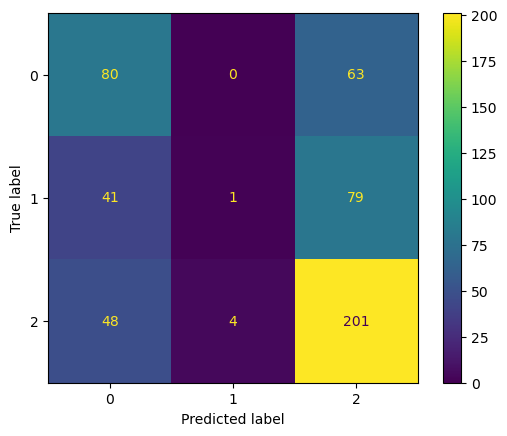

In [143]:
ConfusionMatrixDisplay(c).plot()

**We didn't manage to improve the accuracy of the model. We are going to try one more time.**

In [144]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['multinomial','ovr'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [146]:
grid_model = GridSearchCV(model,param_grid=parameters,scoring='accuracy')

In [147]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000),
             param_grid={'C': array([1.00000000e-05, 1.80472177e-05, 3.25702066e-05, 5.87801607e-05,
       1.06081836e-04, 1.91448198e-04, 3.45510729e-04, 6.23550734e-04,
       1.12533558e-03, 2.03091762e-03, 3.66524124e-03, 6.61474064e-03,
       1.19377664e-02, 2.15443469e-02, 3.88815518e-02, 7.01703829e-02,
       1.26638017e-01, 2.28546386e-01,...
       1.51177507e+02, 2.72833338e+02, 4.92388263e+02, 8.88623816e+02,
       1.60371874e+03, 2.89426612e+03, 5.22334507e+03, 9.42668455e+03,
       1.70125428e+04, 3.07029063e+04, 5.54102033e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['multinomial', 'ovr'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']},
             scoring='roc_auc_ovr_weighted')

In [148]:
grid_model.best_params_

{'C': 4.37547937507418,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'ovr',
 'solver': 'lbfgs'}

In [149]:
pred = grid_model.predict(scaled_X_test)

In [150]:
c = confusion_matrix(y_test,pred)

In [151]:
c

array([[ 80,   1,  62],
       [ 41,   1,  79],
       [ 48,   4, 201]], dtype=int64)

In [152]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           A       0.47      0.56      0.51       143
           D       0.17      0.01      0.02       121
           H       0.59      0.79      0.68       253

    accuracy                           0.55       517
   macro avg       0.41      0.45      0.40       517
weighted avg       0.46      0.55      0.48       517



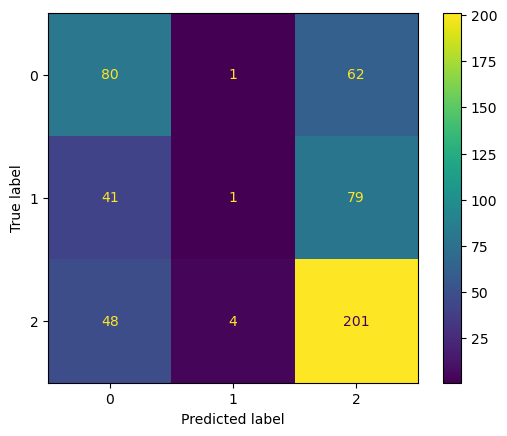

In [153]:
ConfusionMatrixDisplay(c).plot()

**As we can see the accuracy remained the same. Probably we can't improve the model even further.**

**Scenario 1 best accuracy for bundesliga is 0.56.**

Features:
- AVGH
- AVGD,
- AVGA,
- HT_draws,
- AT_draws,
- HT_losses,
- AT_losses,
- l5_ravg_HTST,
- l5_ravg_HTCR,
- l5_ravg_ATCR,
- l5_ravg_HTxG,
- l5_ravg_ATxG,
- l5_ravg_HTxpts,
- l5_ravg_ATxpts,
- l5_ravg_HTdeep,
- l5_htdiff,
- avgHTP,
- avgATP,
- diff_points


# **Premier League**

In [31]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\premier_league.csv")

In [32]:
df.HomeTeam.unique()

array(['Arsenal', 'Leicester', 'Man United', 'QPR', 'Stoke', 'West Brom',
       'West Ham', 'Liverpool', 'Newcastle', 'Burnley', 'Aston Villa',
       'Chelsea', 'Crystal Palace', 'Everton', 'Southampton', 'Swansea',
       'Hull', 'Sunderland', 'Tottenham', 'Man City', 'Bournemouth',
       'Norwich', 'Watford', 'Middlesbrough', 'Brighton', 'Huddersfield',
       'Fulham', 'Wolves', 'Cardiff', 'Sheffield United'], dtype=object)

In [33]:
#We assign a unique value at every team of the league
team_id = {'Arsenal':1, 'Leicester':2, 'Man United':3, 'QPR':4, 'Stoke':5, 'West Brom':6,
           'West Ham':7, 'Liverpool':8, 'Newcastle':9, 'Burnley':10, 'Aston Villa':11,
           'Chelsea':12, 'Crystal Palace':13, 'Everton':14, 'Southampton':15, 'Swansea':16,
           'Hull':17, 'Sunderland':18, 'Tottenham':19, 'Man City':20, 'Bournemouth':21,
           'Norwich':22, 'Watford':23, 'Middlesbrough':24, 'Brighton':25, 'Huddersfield':26,
           'Fulham':27, 'Wolves':28, 'Cardiff':29, 'Sheffield United':30}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [34]:
#We are dropping the stats that are not available to us before the game and some features 
#that we used for creating more relevant ones
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD','season',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints','AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs','l5_ravg_HTgc', 'l5_ravg_ATgc',
              'HTL', 'ATL', 'ATD', 'ATW'],axis=1)

df = df.dropna()

In [35]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'round', 'AVGH', 'AVGD', 'AVGA',
       'HT_wins', 'AT_wins', 'HT_draws', 'AT_draws', 'HT_losses', 'AT_losses',
       'l5_ravg_HTST', 'l5_ravg_ATST', 'l5_ravg_HTCR', 'l5_ravg_ATCR',
       'HToveral', 'AToveral', 'l5_ravg_HTxG', 'l5_ravg_ATxG',
       'l5_ravg_HTxpts', 'l5_ravg_ATxpts', 'l5_ravg_HTdeep', 'l5_ravg_ATdeep',
       'l5_ravg_HTppda', 'l5_ravg_ATppda', 'l5_htdiff', 'l5_atdiff', 'avgHTP',
       'avgATP', 'l5_ravg_HTp', 'l3_ravg_ATp', 'diff_points', 'diff_ATT',
       'diff_MID', 'diff_DEF', 'diff_OVA'],
      dtype='object')

In [36]:
X = df.drop('FTR',axis=1)
y = df['FTR']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [38]:
base = LogisticRegression(multi_class='multinomial', max_iter=9000)

In [39]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
base.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=9000, multi_class='multinomial')

In [41]:
pred = base.predict(scaled_X_test)

In [42]:
confusion_matrix(y_test,pred)

array([[ 99,   2,  80],
       [ 38,   2, 120],
       [ 47,   6, 260]], dtype=int64)

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           A       0.54      0.55      0.54       181
           D       0.20      0.01      0.02       160
           H       0.57      0.83      0.67       313

    accuracy                           0.55       654
   macro avg       0.43      0.46      0.41       654
weighted avg       0.47      0.55      0.48       654



In [15]:
X.shape

(1980, 37)

 Clf result : 0.542, +- 0.011 N_features : 5
 Clf result : 0.544, +- 0.009 N_features : 6
 Clf result : 0.538, +- 0.007 N_features : 7
 Clf result : 0.542, +- 0.010 N_features : 8
 Clf result : 0.535, +- 0.012 N_features : 9
 Clf result : 0.541, +- 0.019 N_features : 10
 Clf result : 0.543, +- 0.021 N_features : 11
 Clf result : 0.543, +- 0.022 N_features : 12
 Clf result : 0.540, +- 0.024 N_features : 13
 Clf result : 0.538, +- 0.023 N_features : 14
 Clf result : 0.544, +- 0.028 N_features : 15
 Clf result : 0.541, +- 0.029 N_features : 16
 Clf result : 0.541, +- 0.029 N_features : 17
 Clf result : 0.554, +- 0.022 N_features : 18
 Clf result : 0.552, +- 0.020 N_features : 19
 Clf result : 0.552, +- 0.016 N_features : 20
 Clf result : 0.554, +- 0.021 N_features : 21
 Clf result : 0.553, +- 0.020 N_features : 22
 Clf result : 0.554, +- 0.021 N_features : 23
 Clf result : 0.551, +- 0.021 N_features : 24
 Clf result : 0.551, +- 0.022 N_features : 25
 Clf result : 0.550, +- 0.021 N_feature

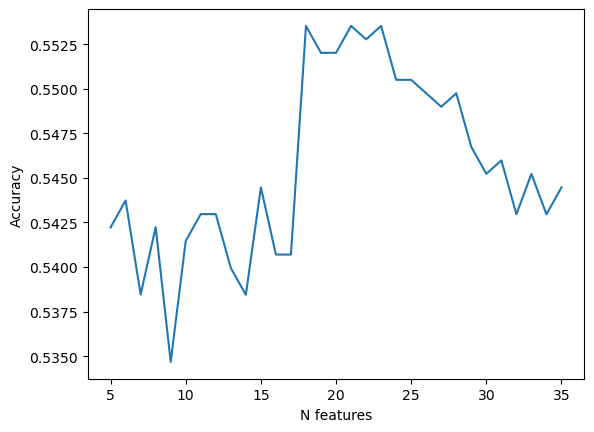

In [16]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =base, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.33)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(base, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()


In [44]:
rfe = RFE(estimator=base, n_features_to_select = 19, step=1)
rfe.fit(X, y)

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [45]:
featured_columns

['round',
 'AVGH',
 'AVGD',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_htdiff',
 'avgHTP',
 'avgATP',
 'diff_points',
 'diff_MID']

In [46]:
X = df[featured_columns]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [48]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
base.fit(scaled_X_train,y_train)
rfe_pred = base.predict(scaled_X_test)

In [50]:
confusion_matrix(y_test,rfe_pred)

array([[100,   2,  79],
       [ 39,   2, 119],
       [ 48,   3, 262]], dtype=int64)

In [51]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.53      0.55      0.54       181
           D       0.29      0.01      0.02       160
           H       0.57      0.84      0.68       313

    accuracy                           0.56       654
   macro avg       0.46      0.47      0.42       654
weighted avg       0.49      0.56      0.48       654



In [52]:
parameters = {'C': np.logspace(-3,3,20), 'multi_class':['multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [53]:
grid_model = GridSearchCV(base,param_grid=parameters)

In [54]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [55]:
grid_model.best_params_

{'C': 0.1623776739188721,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [56]:
grid_pred = grid_model.predict(scaled_X_test)

In [57]:
confusion_matrix(y_test,grid_pred)

array([[100,   0,  81],
       [ 41,   0, 119],
       [ 45,   0, 268]], dtype=int64)

In [58]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           A       0.54      0.55      0.54       181
           D       0.00      0.00      0.00       160
           H       0.57      0.86      0.69       313

    accuracy                           0.56       654
   macro avg       0.37      0.47      0.41       654
weighted avg       0.42      0.56      0.48       654



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We are going to try one more time

In [271]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [272]:
grid_model = GridSearchCV(base,param_grid=parameters)

In [273]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e-05, 1.80472177e-05, 3.25702066e-05, 5.87801607e-05,
       1.06081836e-04, 1.91448198e-04, 3.45510729e-04, 6.23550734e-04,
       1.12533558e-03, 2.03091762e-03, 3.66524124e-03, 6.61474064e-03,
       1.19377664e-02, 2.15443469e-02, 3.88815518e-02, 7.01703829e-02,
       1.26...
       1.42510267e+01, 2.57191381e+01, 4.64158883e+01, 8.37677640e+01,
       1.51177507e+02, 2.72833338e+02, 4.92388263e+02, 8.88623816e+02,
       1.60371874e+03, 2.89426612e+03, 5.22334507e+03, 9.42668455e+03,
       1.70125428e+04, 3.07029063e+04, 5.54102033e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [274]:
grid_model.best_params_

{'C': 0.7443803013251681,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [275]:
grid_pred = grid_model.predict(scaled_X_test)

In [276]:
confusion_matrix(y_test,grid_pred)

array([[ 96,   2,  83],
       [ 43,   1, 116],
       [ 46,   1, 266]], dtype=int64)

In [277]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           A       0.52      0.53      0.52       181
           D       0.25      0.01      0.01       160
           H       0.57      0.85      0.68       313

    accuracy                           0.56       654
   macro avg       0.45      0.46      0.41       654
weighted avg       0.48      0.56      0.48       654



**Scenario 1 best accuracy for Premier League is 0.56.**

Features:
- AVGH
- round
- AVGA
- HT_draws
- AT_draws
- HT_losses
- AT_losses
- l5_ravg_HTST
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_HTxpts
- l5_ravg_ATxpts
- l5_atdiff
- avgHTP
- avgATP
- diff_points
- diff_MID

# **La Liga**

In [17]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\la_liga.csv")

In [18]:
df.HomeTeam.unique()

array(['Almeria', 'Granada', 'Malaga', 'Sevilla', 'Barcelona', 'Celta',
       'Eibar', 'Levante', 'Real Madrid', 'Vallecano', 'Getafe',
       'Valencia', 'Ath Bilbao', 'Ath Madrid', 'Cordoba', 'Espanol',
       'Elche', 'La Coruna', 'Sociedad', 'Villarreal', 'Betis',
       'Sp Gijon', 'Las Palmas', 'Leganes', 'Osasuna', 'Alaves', 'Girona',
       'Valladolid', 'Huesca', 'Mallorca'], dtype=object)

In [19]:
#We assign a unique value at every team of the league
team_id = {'Almeria':1, 'Granada':2, 'Malaga':3, 'Sevilla':4, 'Barcelona':5, 'Celta':6,
           'Eibar':7, 'Levante':8, 'Real Madrid':9, 'Vallecano':10, 'Getafe':11,
           'Valencia':12, 'Ath Bilbao':13, 'Ath Madrid':14, 'Cordoba':15, 'Espanol':16,
           'Elche':17, 'La Coruna':18, 'Sociedad':19, 'Villarreal':20, 'Betis':21,
           'Sp Gijon':22, 'Las Palmas':23, 'Leganes':24, 'Osasuna':25, 'Alaves':26, 'Girona':27,
           'Valladolid':28, 'Huesca':29, 'Mallorca':30}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [20]:
#We are dropping the starts that are not available to us before the game 
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD','season',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints','AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs','l5_ravg_HTgc', 'l5_ravg_ATgc',
              'HTL', 'ATL', 'ATD', 'ATW'],axis=1)

df = df.dropna()

In [21]:
X = df.drop('FTR',axis=1)
y = df['FTR']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [23]:
base = LogisticRegression(multi_class='multinomial', max_iter=9000)

In [24]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
base.fit(scaled_X_train,y_train)

LogisticRegression(max_iter=9000, multi_class='multinomial')

In [26]:
base_pred = base.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test,base_pred)

array([[ 80,  12,  92],
       [ 53,   8,  98],
       [ 60,   7, 244]], dtype=int64)

In [28]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.41      0.43      0.42       184
           D       0.30      0.05      0.09       159
           H       0.56      0.78      0.66       311

    accuracy                           0.51       654
   macro avg       0.42      0.42      0.39       654
weighted avg       0.46      0.51      0.45       654



In [29]:
X_train.shape

(1325, 36)

 Clf result : 0.540, +- 0.017 N_features : 5
 Clf result : 0.542, +- 0.017 N_features : 6
 Clf result : 0.545, +- 0.017 N_features : 7
 Clf result : 0.536, +- 0.015 N_features : 8
 Clf result : 0.545, +- 0.010 N_features : 9
 Clf result : 0.549, +- 0.013 N_features : 10
 Clf result : 0.549, +- 0.012 N_features : 11
 Clf result : 0.548, +- 0.010 N_features : 12
 Clf result : 0.546, +- 0.016 N_features : 13
 Clf result : 0.548, +- 0.016 N_features : 14
 Clf result : 0.543, +- 0.011 N_features : 15
 Clf result : 0.543, +- 0.014 N_features : 16
 Clf result : 0.541, +- 0.016 N_features : 17
 Clf result : 0.543, +- 0.016 N_features : 18
 Clf result : 0.541, +- 0.019 N_features : 19
 Clf result : 0.543, +- 0.017 N_features : 20
 Clf result : 0.546, +- 0.016 N_features : 21
 Clf result : 0.547, +- 0.011 N_features : 22
 Clf result : 0.549, +- 0.012 N_features : 23
 Clf result : 0.543, +- 0.013 N_features : 24
 Clf result : 0.545, +- 0.015 N_features : 25
 Clf result : 0.540, +- 0.017 N_feature

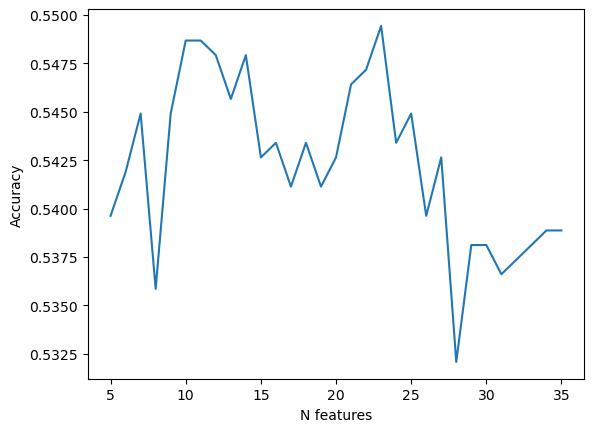

In [30]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =base, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.33)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(base, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [31]:
rfe = RFE(estimator=base, n_features_to_select = 23, step=1)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=9000, multi_class='multinomial'),
    n_features_to_select=23)

In [32]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

In [33]:
featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [34]:
featured_columns

['AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'diff_points',
 'diff_MID',
 'diff_OVA']

In [35]:
X = df[featured_columns]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [38]:
base.fit(scaled_X_train,y_train)
rfe_pred = base.predict(scaled_X_test)

In [39]:
confusion_matrix(y_test,rfe_pred)

array([[ 79,   4, 101],
       [ 53,   6, 100],
       [ 52,   5, 254]], dtype=int64)

In [40]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.43      0.43      0.43       184
           D       0.40      0.04      0.07       159
           H       0.56      0.82      0.66       311

    accuracy                           0.52       654
   macro avg       0.46      0.43      0.39       654
weighted avg       0.48      0.52      0.45       654



In [41]:
parameters = {'C': np.logspace(-3,3,20), 'multi_class':['multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [42]:
grid_model = GridSearchCV(base,param_grid=parameters)

In [43]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [44]:
grid_model.best_params_

{'C': 0.004281332398719396,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [45]:
grid_pred = grid_model.predict(scaled_X_test)

In [46]:
confusion_matrix(y_test,grid_pred)

array([[ 93,   4,  87],
       [ 52,   6, 101],
       [ 60,   4, 247]], dtype=int64)

In [47]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           A       0.45      0.51      0.48       184
           D       0.43      0.04      0.07       159
           H       0.57      0.79      0.66       311

    accuracy                           0.53       654
   macro avg       0.48      0.45      0.40       654
weighted avg       0.50      0.53      0.47       654



In [48]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [49]:
grid_model = GridSearchCV(base,param_grid=parameters)

In [50]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e-05, 1.80472177e-05, 3.25702066e-05, 5.87801607e-05,
       1.06081836e-04, 1.91448198e-04, 3.45510729e-04, 6.23550734e-04,
       1.12533558e-03, 2.03091762e-03, 3.66524124e-03, 6.61474064e-03,
       1.19377664e-02, 2.15443469e-02, 3.88815518e-02, 7.01703829e-02,
       1.26...
       1.42510267e+01, 2.57191381e+01, 4.64158883e+01, 8.37677640e+01,
       1.51177507e+02, 2.72833338e+02, 4.92388263e+02, 8.88623816e+02,
       1.60371874e+03, 2.89426612e+03, 5.22334507e+03, 9.42668455e+03,
       1.70125428e+04, 3.07029063e+04, 5.54102033e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [51]:
grid_model.best_params_

{'C': 0.4124626382901348,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [52]:
grid_pred = grid_model.predict(scaled_X_test)

In [53]:
confusion_matrix(y_test,grid_pred)

array([[ 76,   3, 105],
       [ 54,   5, 100],
       [ 50,   3, 258]], dtype=int64)

In [54]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           A       0.42      0.41      0.42       184
           D       0.45      0.03      0.06       159
           H       0.56      0.83      0.67       311

    accuracy                           0.52       654
   macro avg       0.48      0.42      0.38       654
weighted avg       0.49      0.52      0.45       654



**The best we could get is 0.53 accuracy**

Features:
- AVGH
- AVGD
- AVGA
- HT_wins
- AT_wins
- HT_draws
- AT_draws
- HT_losses
- AT_losses
- l5_ravg_ATST
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_HTxpts
- l5_htdiff
- l5_atdiff
- avgHTP
- avgATP
- l5_ravg_HTp
- diff_points
- diff_MID
- diff_OVA

# Serie A

In [43]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\serie_a.csv")

In [44]:
df.HomeTeam.unique()

array(['Chievo', 'Roma', 'Atalanta', 'Cesena', 'Genoa', 'Milan',
       'Palermo', 'Sassuolo', 'Torino', 'Udinese', 'Empoli', 'Juventus',
       'Cagliari', 'Fiorentina', 'Inter', 'Lazio', 'Napoli', 'Parma',
       'Sampdoria', 'Verona', 'Frosinone', 'Bologna', 'Carpi', 'Pescara',
       'Crotone', 'Benevento', 'Spal', 'Lecce', 'Brescia'], dtype=object)

In [45]:
#We assign a unique value at every team of the league
team_id = {'Chievo':1, 'Roma':2, 'Atalanta':3, 'Cesena':4, 'Genoa':5, 'Milan':6,
           'Palermo':7, 'Sassuolo':8, 'Torino':9, 'Udinese':10, 'Empoli':11, 'Juventus':12,
           'Cagliari':13, 'Fiorentina':14, 'Inter':15, 'Lazio':16, 'Napoli':17, 'Parma':18,
           'Sampdoria':19, 'Verona':20, 'Frosinone':21, 'Bologna':22, 'Carpi':23, 'Pescara':24,
           'Crotone':25, 'Benevento':26, 'Spal':27, 'Lecce':28, 'Brescia':29}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [46]:
#We are dropping the starts that are not available to us before the game 
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD','season',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints', 'AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs',
              'HTL', 'ATL', 'ATD', 'ATW','l5_ravg_HTgc', 'l5_ravg_ATgc','round'],axis=1)

df = df.dropna()

In [47]:
X = df.drop('FTR',axis=1)
y = df['FTR']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [49]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [50]:
first_model = LogisticRegression(max_iter=9000,multi_class='multinomial')

first_model.fit(scaled_X_train,y_train)
first_model_pred = first_model.predict(scaled_X_test)

In [51]:
confusion_matrix(y_test,first_model_pred)

array([[117,  11,  69],
       [ 65,   6, 105],
       [ 45,  11, 224]], dtype=int64)

In [52]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.52      0.59      0.55       197
           D       0.21      0.03      0.06       176
           H       0.56      0.80      0.66       280

    accuracy                           0.53       653
   macro avg       0.43      0.48      0.42       653
weighted avg       0.45      0.53      0.47       653



 Clf result : 0.538, +- 0.023 N_features : 5
 Clf result : 0.541, +- 0.023 N_features : 6
 Clf result : 0.532, +- 0.025 N_features : 7
 Clf result : 0.531, +- 0.023 N_features : 8
 Clf result : 0.528, +- 0.021 N_features : 9
 Clf result : 0.530, +- 0.018 N_features : 10
 Clf result : 0.533, +- 0.018 N_features : 11
 Clf result : 0.532, +- 0.022 N_features : 12
 Clf result : 0.531, +- 0.019 N_features : 13
 Clf result : 0.529, +- 0.020 N_features : 14
 Clf result : 0.528, +- 0.022 N_features : 15
 Clf result : 0.528, +- 0.020 N_features : 16
 Clf result : 0.526, +- 0.022 N_features : 17
 Clf result : 0.533, +- 0.020 N_features : 18
 Clf result : 0.532, +- 0.019 N_features : 19
 Clf result : 0.534, +- 0.017 N_features : 20
 Clf result : 0.536, +- 0.020 N_features : 21
 Clf result : 0.533, +- 0.021 N_features : 22
 Clf result : 0.534, +- 0.025 N_features : 23
 Clf result : 0.536, +- 0.023 N_features : 24
 Clf result : 0.529, +- 0.025 N_features : 25
 Clf result : 0.531, +- 0.023 N_feature

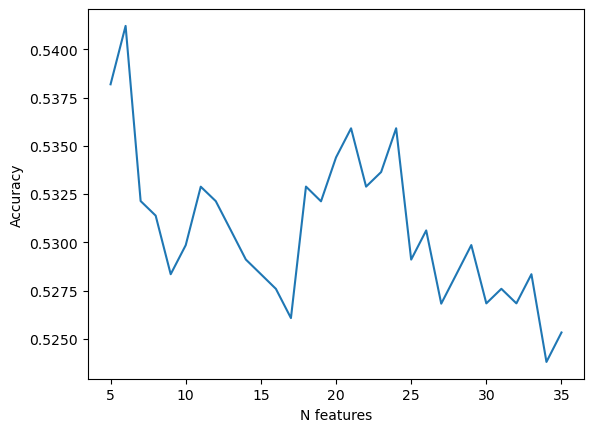

In [12]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y)
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size = 0.33)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()


In [53]:
rfe = RFE(estimator =first_model, n_features_to_select = 6, step=1)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=9000, multi_class='multinomial'),
    n_features_to_select=6)

In [54]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

In [55]:
featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [56]:
featured_columns

['AVGH', 'AVGD', 'AVGA', 'l5_ravg_ATCR', 'avgHTP', 'avgATP']

In [57]:
X = df[featured_columns]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [59]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
first_model.fit(scaled_X_train,y_train)
first_model_pred = first_model.predict(scaled_X_test)

In [61]:
confusion_matrix(y_test,first_model_pred)

array([[123,   0,  74],
       [ 52,   0, 124],
       [ 38,   0, 242]], dtype=int64)

In [62]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.58      0.62      0.60       197
           D       0.00      0.00      0.00       176
           H       0.55      0.86      0.67       280

    accuracy                           0.56       653
   macro avg       0.38      0.50      0.42       653
weighted avg       0.41      0.56      0.47       653



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [64]:
grid_model = GridSearchCV(first_model,param_grid=parameters)

In [65]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=9000,
                                          multi_class='multinomial'),
             param_grid={'C': array([1.00000000e-05, 1.80472177e-05, 3.25702066e-05, 5.87801607e-05,
       1.06081836e-04, 1.91448198e-04, 3.45510729e-04, 6.23550734e-04,
       1.12533558e-03, 2.03091762e-03, 3.66524124e-03, 6.61474064e-03,
       1.19377664e-02, 2.15443469e-02, 3.88815518e-02, 7.01703829e-02,
       1.26...
       1.42510267e+01, 2.57191381e+01, 4.64158883e+01, 8.37677640e+01,
       1.51177507e+02, 2.72833338e+02, 4.92388263e+02, 8.88623816e+02,
       1.60371874e+03, 2.89426612e+03, 5.22334507e+03, 9.42668455e+03,
       1.70125428e+04, 3.07029063e+04, 5.54102033e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [66]:
grid_model.best_params_

{'C': 0.22854638641349884,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [67]:
grid_pred = grid_model.predict(scaled_X_test)

In [68]:
confusion_matrix(y_test,grid_pred)

array([[118,   0,  79],
       [ 49,   0, 127],
       [ 36,   0, 244]], dtype=int64)

In [69]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           A       0.58      0.60      0.59       197
           D       0.00      0.00      0.00       176
           H       0.54      0.87      0.67       280

    accuracy                           0.55       653
   macro avg       0.37      0.49      0.42       653
weighted avg       0.41      0.55      0.46       653



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The best accuracy we could get is 0.56**

Features:
- AVGH 
- AVGD
- AVGA
- l5_ravg_ATCR
- avgHTP
- avgATP

An interesting fact is that for every championship the **features of great importance were different!**

# Scenario 2

**Bundesliga**

In [10]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\bundesliga.csv")

In [11]:
#We assign a unique value at every team of the league
team_id = {'Bayern Munich':1, 'Dortmund':2, 'Ein Frankfurt':3, 'FC Koln':4,
           'Hannover':5, 'Hertha':6, 'Hoffenheim':7, "M'gladbach":8, 'Paderborn':9,
           'Augsburg':10, 'Hamburg':11, 'Leverkusen':12, 'Schalke 04':13, 'Stuttgart':14,
           'Werder Bremen':15, 'Wolfsburg':16, 'Freiburg':17, 'Mainz':18, 'Darmstadt':19,
           'Ingolstadt':20, 'RB Leipzig':21, 'Fortuna Dusseldorf':22, 'Nurnberg':23,
           'Union Berlin':24}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [12]:
#We are dropping the starts that are not available to us before the game 
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints', 'AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs',
              'HTL', 'ATL', 'ATD', 'ATW','l5_ravg_HTgc', 'l5_ravg_ATgc'],axis=1)

df = df.dropna()

In [13]:
s1415 = df[df['season']=='2014/2015'].drop('season',axis=1)
s1516 = df[df['season']=='2015/2016'].drop('season',axis=1)
s1617 = df[df['season']=='2016/2017'].drop('season',axis=1)
s1718 = df[df['season']=='2017/2018'].drop('season',axis=1)
s1819 = df[df['season']=='2018/2019'].drop('season',axis=1)
s1920 = df[df['season']=='2019/2020'].drop('season',axis=1)

**Season 1415**

In [14]:
X = s1415.drop('FTR',axis=1)
y = s1415[['FTR','round']]

In [15]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [16]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
first_model = LogisticRegression(max_iter=5000)

first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [18]:
confusion_matrix(y_test,first_model_pred)

array([[15, 19,  6],
       [ 9, 19, 11],
       [ 8, 44, 22]], dtype=int64)

In [19]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.47      0.38      0.42        40
           D       0.23      0.49      0.31        39
           H       0.56      0.30      0.39        74

    accuracy                           0.37       153
   macro avg       0.42      0.39      0.37       153
weighted avg       0.45      0.37      0.38       153



As we can see our base model has significantly low accuracy when we are training to predict the second leg of the championship.


We are going to implement RFE to see if we can improve it by dropping some features.

 Clf result : 0.497, +- 0.065 N_features : 5
 Clf result : 0.484, +- 0.064 N_features : 6
 Clf result : 0.484, +- 0.062 N_features : 7
 Clf result : 0.484, +- 0.062 N_features : 8
 Clf result : 0.464, +- 0.028 N_features : 9
 Clf result : 0.478, +- 0.049 N_features : 10
 Clf result : 0.464, +- 0.012 N_features : 11
 Clf result : 0.484, +- 0.043 N_features : 12
 Clf result : 0.444, +- 0.034 N_features : 13
 Clf result : 0.438, +- 0.029 N_features : 14
 Clf result : 0.444, +- 0.045 N_features : 15
 Clf result : 0.444, +- 0.034 N_features : 16
 Clf result : 0.451, +- 0.023 N_features : 17
 Clf result : 0.451, +- 0.023 N_features : 18
 Clf result : 0.451, +- 0.023 N_features : 19
 Clf result : 0.438, +- 0.024 N_features : 20
 Clf result : 0.438, +- 0.019 N_features : 21
 Clf result : 0.451, +- 0.027 N_features : 22
 Clf result : 0.444, +- 0.042 N_features : 23
 Clf result : 0.431, +- 0.028 N_features : 24
 Clf result : 0.445, +- 0.040 N_features : 25
 Clf result : 0.438, +- 0.048 N_feature

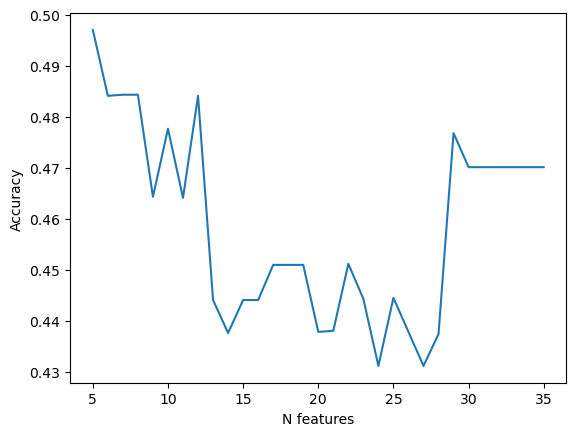

In [12]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()


In [20]:
rfe = RFE(estimator =first_model, n_features_to_select =30 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=30)

In [21]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

In [22]:
featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [23]:
featured_columns

['AwayTeam',
 'round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_ATppda',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_points',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [24]:
X = s1415[featured_columns]
y = s1415[['FTR','round']]

In [25]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [26]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [27]:
first_model = LogisticRegression(max_iter=9000)

first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [28]:
confusion_matrix(y_test,first_model_pred)

array([[12, 21,  7],
       [ 5, 24, 10],
       [ 6, 47, 21]], dtype=int64)

In [29]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.52      0.30      0.38        40
           D       0.26      0.62      0.37        39
           H       0.55      0.28      0.38        74

    accuracy                           0.37       153
   macro avg       0.45      0.40      0.37       153
weighted avg       0.47      0.37      0.37       153



Feature selection didn't actually help. A very interesting fact is that it has a **recall** at draws of 0,62.

**GridSearchCV**

In [23]:
parameters = {'C': np.logspace(-5,5,20), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [24]:
grid_model = GridSearchCV(first_model,param_grid=parameters)

In [25]:
grid_model.fit(scaled_X_train,y_train.values.ravel())

GridSearchCV(estimator=LogisticRegression(max_iter=9000),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [26]:
grid_model.best_params_

{'C': 0.1623776739188721,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'ovr',
 'solver': 'newton-cg'}

In [32]:
grid = LogisticRegression(C = 0.1623776739188721, class_weight=None, fit_intercept=True,
                          multi_class='ovr', solver='newton-cg', max_iter=9000)

grid.fit(scaled_X_train,y_train)


C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1623776739188721, max_iter=9000, multi_class='ovr',
                   solver='newton-cg')

In [34]:
grid_pred = grid.predict(scaled_X_test)

In [36]:
confusion_matrix(y_test,grid_pred)

array([[17,  2, 21],
       [11,  2, 26],
       [12,  7, 55]], dtype=int64)

In [35]:
print(classification_report(y_test.values.ravel(),grid_pred))

              precision    recall  f1-score   support

           A       0.42      0.42      0.42        40
           D       0.18      0.05      0.08        39
           H       0.54      0.74      0.62        74

    accuracy                           0.48       153
   macro avg       0.38      0.41      0.38       153
weighted avg       0.42      0.48      0.43       153



**Season 1516**

In [37]:
X = s1516.drop('FTR',axis=1)
y = s1516[['FTR','round']]

In [38]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [39]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
first_model = LogisticRegression(max_iter=5000)

first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [41]:
confusion_matrix(y_test,first_model_pred)

array([[ 7,  3, 36],
       [ 7,  1, 30],
       [ 3,  3, 63]], dtype=int64)

In [42]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.41      0.15      0.22        46
           D       0.14      0.03      0.04        38
           H       0.49      0.91      0.64        69

    accuracy                           0.46       153
   macro avg       0.35      0.36      0.30       153
weighted avg       0.38      0.46      0.36       153



The base model does a pretty good job at predicting the home win, but it underperforms when it comes to the other two classes. Nevertheless, it achieves an accuracy of 0,46. 

 Clf result : 0.471, +- 0.043 N_features : 5
 Clf result : 0.438, +- 0.073 N_features : 6
 Clf result : 0.483, +- 0.076 N_features : 7
 Clf result : 0.470, +- 0.076 N_features : 8
 Clf result : 0.470, +- 0.080 N_features : 9
 Clf result : 0.444, +- 0.031 N_features : 10
 Clf result : 0.431, +- 0.020 N_features : 11
 Clf result : 0.458, +- 0.007 N_features : 12
 Clf result : 0.451, +- 0.032 N_features : 13
 Clf result : 0.477, +- 0.043 N_features : 14
 Clf result : 0.483, +- 0.062 N_features : 15
 Clf result : 0.483, +- 0.056 N_features : 16
 Clf result : 0.476, +- 0.054 N_features : 17
 Clf result : 0.476, +- 0.054 N_features : 18
 Clf result : 0.490, +- 0.050 N_features : 19
 Clf result : 0.490, +- 0.050 N_features : 20
 Clf result : 0.476, +- 0.054 N_features : 21
 Clf result : 0.483, +- 0.050 N_features : 22
 Clf result : 0.476, +- 0.054 N_features : 23
 Clf result : 0.470, +- 0.060 N_features : 24
 Clf result : 0.490, +- 0.040 N_features : 25
 Clf result : 0.503, +- 0.050 N_feature

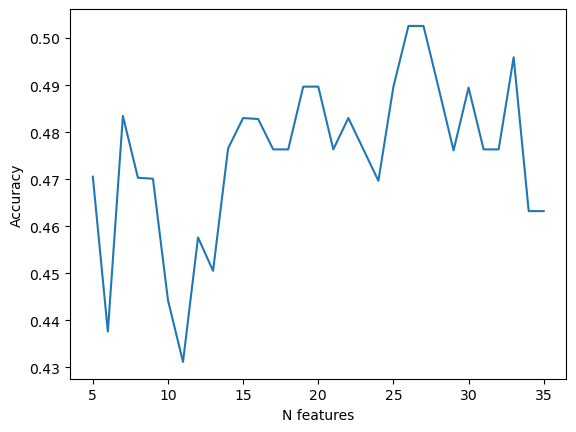

In [132]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()


In [14]:
rfe = RFE(estimator =first_model, n_features_to_select =26 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=26)

In [15]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

In [16]:
featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [17]:
featured_columns

['round',
 'AVGH',
 'AVGD',
 'HT_wins',
 'AT_draws',
 'HT_losses',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATppda',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_points',
 'diff_ATT',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [18]:
X = s1516[featured_columns]
y = s1516[['FTR','round']]

In [19]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
first_model = LogisticRegression(max_iter=5000)

first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [22]:
confusion_matrix(y_test,first_model_pred)

array([[ 9,  1, 36],
       [ 0,  0, 38],
       [ 3,  2, 64]], dtype=int64)

In [23]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.75      0.20      0.31        46
           D       0.00      0.00      0.00        38
           H       0.46      0.93      0.62        69

    accuracy                           0.48       153
   macro avg       0.40      0.37      0.31       153
weighted avg       0.43      0.48      0.37       153



In [24]:
parameters = {'C': np.logspace(-5,5,20), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [25]:
grid_model = GridSearchCV(first_model,param_grid=parameters)

In [26]:
grid_model.fit(scaled_X_train,y_train.values.ravel())

C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\linea

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'saga', 'sag', 'lbfgs']})

In [27]:
grid_model.best_params_

{'C': 0.1623776739188721,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [28]:
grid_pred = grid_model.predict(scaled_X_test)

In [29]:
confusion_matrix(y_test,grid_pred)

array([[10,  0, 36],
       [ 2,  0, 36],
       [ 4,  0, 65]], dtype=int64)

In [30]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           A       0.62      0.22      0.32        46
           D       0.00      0.00      0.00        38
           H       0.47      0.94      0.63        69

    accuracy                           0.49       153
   macro avg       0.37      0.39      0.32       153
weighted avg       0.40      0.49      0.38       153



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Season 1617**

In [45]:
X = s1617.drop('FTR',axis=1)
y = s1617[['FTR','round']]

In [46]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [47]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [48]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [49]:
confusion_matrix(y_test,first_model_pred)

array([[19,  4, 18],
       [15,  3, 17],
       [21,  6, 50]], dtype=int64)

In [50]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.35      0.46      0.40        41
           D       0.23      0.09      0.13        35
           H       0.59      0.65      0.62        77

    accuracy                           0.47       153
   macro avg       0.39      0.40      0.38       153
weighted avg       0.44      0.47      0.45       153



The base model doesn't perform really well. 

Let's see if by implementing **RFE** we can improve it.

 Clf result : 0.484, +- 0.034 N_features : 5
 Clf result : 0.517, +- 0.061 N_features : 6
 Clf result : 0.523, +- 0.059 N_features : 7
 Clf result : 0.530, +- 0.069 N_features : 8
 Clf result : 0.537, +- 0.059 N_features : 9
 Clf result : 0.523, +- 0.067 N_features : 10
 Clf result : 0.523, +- 0.067 N_features : 11
 Clf result : 0.523, +- 0.067 N_features : 12
 Clf result : 0.523, +- 0.067 N_features : 13
 Clf result : 0.517, +- 0.072 N_features : 14
 Clf result : 0.504, +- 0.063 N_features : 15
 Clf result : 0.497, +- 0.074 N_features : 16
 Clf result : 0.497, +- 0.043 N_features : 17
 Clf result : 0.503, +- 0.045 N_features : 18
 Clf result : 0.497, +- 0.057 N_features : 19
 Clf result : 0.490, +- 0.042 N_features : 20
 Clf result : 0.477, +- 0.058 N_features : 21
 Clf result : 0.484, +- 0.057 N_features : 22
 Clf result : 0.477, +- 0.058 N_features : 23
 Clf result : 0.471, +- 0.061 N_features : 24
 Clf result : 0.451, +- 0.076 N_features : 25
 Clf result : 0.458, +- 0.069 N_feature

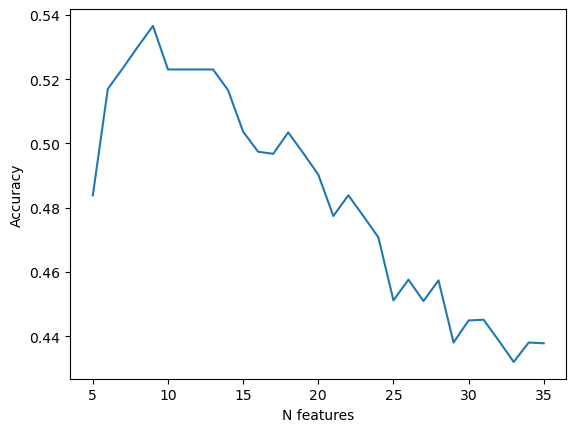

In [51]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [52]:
rfe = RFE(estimator = first_model, n_features_to_select = 9, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=9000), n_features_to_select=9)

In [53]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

In [54]:
featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [55]:
featured_columns

['AVGH',
 'AVGD',
 'AVGA',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'avgHTP']

In [56]:
X = pd.concat([s1617[featured_columns],s1617['round']],axis=1) 

y = s1617[['FTR','round']]

In [57]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [58]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [60]:
confusion_matrix(y_test,first_model_pred)

array([[11,  0, 30],
       [ 8,  0, 27],
       [ 9,  1, 67]], dtype=int64)

In [61]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.39      0.27      0.32        41
           D       0.00      0.00      0.00        35
           H       0.54      0.87      0.67        77

    accuracy                           0.51       153
   macro avg       0.31      0.38      0.33       153
weighted avg       0.38      0.51      0.42       153



In order for the model to achieve an accuracy of 0,51 we can see that there is a tradeoff between the recall of the home wins and the away wins. Also the draw recall reduced to zero.

In [62]:
parameters = {'C': np.logspace(-5,5,20), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

In [71]:
grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [72]:
confusion_matrix(y_test,grid_model_pred)

array([[ 6,  0, 35],
       [ 7,  0, 28],
       [ 7,  0, 70]], dtype=int64)

In [73]:
print(classification_report(y_test.values.ravel(),grid_model_pred))

              precision    recall  f1-score   support

           A       0.30      0.15      0.20        41
           D       0.00      0.00      0.00        35
           H       0.53      0.91      0.67        77

    accuracy                           0.50       153
   macro avg       0.28      0.35      0.29       153
weighted avg       0.35      0.50      0.39       153



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see after GridSearchCV the accuracy reduced.

The best model is the base model after the implementation of RFE. 

Features:
- AVGH
- AVGD
- AVGA
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_HTxpts
- l5_ravg_ATxpts
- avgHTP

**Season 1718**

In [37]:
X = s1718.drop('FTR',axis=1)
y = s1718[['FTR','round']]

In [38]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [39]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [41]:
confusion_matrix(y_test,first_model_pred)

array([[ 9,  2, 33],
       [ 1,  3, 34],
       [ 4,  3, 64]], dtype=int64)

In [42]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.64      0.20      0.31        44
           D       0.38      0.08      0.13        38
           H       0.49      0.90      0.63        71

    accuracy                           0.50       153
   macro avg       0.50      0.39      0.36       153
weighted avg       0.50      0.50      0.42       153



 Clf result : 0.445, +- 0.055 N_features : 5
 Clf result : 0.439, +- 0.069 N_features : 6
 Clf result : 0.445, +- 0.078 N_features : 7
 Clf result : 0.465, +- 0.069 N_features : 8
 Clf result : 0.426, +- 0.107 N_features : 9
 Clf result : 0.433, +- 0.103 N_features : 10
 Clf result : 0.407, +- 0.115 N_features : 11
 Clf result : 0.407, +- 0.112 N_features : 12
 Clf result : 0.420, +- 0.125 N_features : 13
 Clf result : 0.433, +- 0.110 N_features : 14
 Clf result : 0.413, +- 0.115 N_features : 15
 Clf result : 0.420, +- 0.112 N_features : 16
 Clf result : 0.426, +- 0.114 N_features : 17
 Clf result : 0.426, +- 0.120 N_features : 18
 Clf result : 0.426, +- 0.110 N_features : 19
 Clf result : 0.413, +- 0.114 N_features : 20
 Clf result : 0.407, +- 0.108 N_features : 21
 Clf result : 0.400, +- 0.092 N_features : 22
 Clf result : 0.407, +- 0.115 N_features : 23
 Clf result : 0.400, +- 0.109 N_features : 24
 Clf result : 0.394, +- 0.114 N_features : 25
 Clf result : 0.374, +- 0.111 N_feature

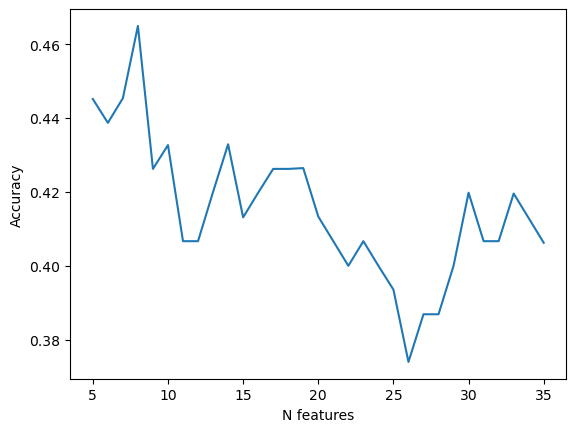

In [104]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [43]:
rfe = RFE(estimator =first_model, n_features_to_select = 8 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=9000), n_features_to_select=8)

In [44]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

In [45]:
featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [46]:
featured_columns

['round',
 'AVGH',
 'l5_ravg_HTCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'avgATP']

In [47]:
X = s1718[featured_columns] 
y = s1718[['FTR','round']]

In [48]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [50]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [51]:
confusion_matrix(y_test,first_model_pred)

array([[ 9,  7, 28],
       [ 3,  4, 31],
       [ 6,  4, 61]], dtype=int64)

In [52]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.50      0.20      0.29        44
           D       0.27      0.11      0.15        38
           H       0.51      0.86      0.64        71

    accuracy                           0.48       153
   macro avg       0.42      0.39      0.36       153
weighted avg       0.45      0.48      0.42       153



After the implementation of **RFE** the accuracy remained the same. There is a slight difference at the recall of home and away team.

We are going to perform GridSearchCV using all the features.

In [53]:
X = s1718.drop('FTR',axis=1)
y = s1718[['FTR','round']]

In [54]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [55]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [56]:
confusion_matrix(y_test,grid_model_pred)

array([[22,  4, 18],
       [13,  5, 20],
       [22,  2, 47]], dtype=int64)

In [57]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.39      0.50      0.44        44
           D       0.45      0.13      0.20        38
           H       0.55      0.66      0.60        71

    accuracy                           0.48       153
   macro avg       0.46      0.43      0.41       153
weighted avg       0.48      0.48      0.46       153



We could improve the model further with GridSearchCV. The best model is the base model with all the features.


**Season 1819**

In [135]:
X = s1819.drop('FTR',axis=1)
y = s1819[['FTR','round']]

In [136]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [137]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [138]:
confusion_matrix(y_test,first_model_pred)

array([[23,  4, 22],
       [ 6,  8, 21],
       [12, 20, 37]], dtype=int64)

In [139]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.56      0.47      0.51        49
           D       0.25      0.23      0.24        35
           H       0.46      0.54      0.50        69

    accuracy                           0.44       153
   macro avg       0.42      0.41      0.42       153
weighted avg       0.45      0.44      0.44       153



Base model doesn't work really well.

 Clf result : 0.477, +- 0.022 N_features : 5
 Clf result : 0.503, +- 0.019 N_features : 6
 Clf result : 0.491, +- 0.027 N_features : 7
 Clf result : 0.484, +- 0.057 N_features : 8
 Clf result : 0.497, +- 0.050 N_features : 9
 Clf result : 0.517, +- 0.045 N_features : 10
 Clf result : 0.517, +- 0.045 N_features : 11
 Clf result : 0.524, +- 0.054 N_features : 12
 Clf result : 0.549, +- 0.038 N_features : 13
 Clf result : 0.549, +- 0.032 N_features : 14
 Clf result : 0.497, +- 0.046 N_features : 15
 Clf result : 0.503, +- 0.038 N_features : 16
 Clf result : 0.477, +- 0.043 N_features : 17
 Clf result : 0.483, +- 0.037 N_features : 18
 Clf result : 0.490, +- 0.040 N_features : 19
 Clf result : 0.476, +- 0.068 N_features : 20
 Clf result : 0.470, +- 0.071 N_features : 21
 Clf result : 0.477, +- 0.063 N_features : 22
 Clf result : 0.457, +- 0.049 N_features : 23
 Clf result : 0.437, +- 0.071 N_features : 24
 Clf result : 0.443, +- 0.083 N_features : 25
 Clf result : 0.457, +- 0.060 N_feature

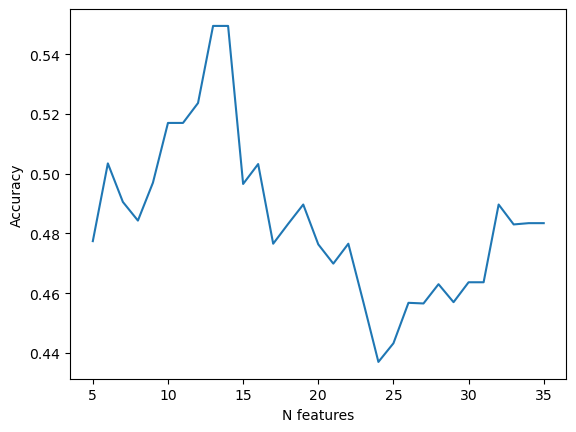

In [140]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [141]:
rfe = RFE(estimator =first_model, n_features_to_select = 13 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=9000), n_features_to_select=13)

In [142]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [143]:
featured_columns

['AVGH',
 'AVGD',
 'AVGA',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'avgHTP',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [144]:
X = pd.concat([s1819[featured_columns],s1819['round']],axis=1) 

y = s1819[['FTR','round']]

In [145]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [146]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [147]:
confusion_matrix(y_test,rfe_pred)

array([[25,  0, 24],
       [10,  1, 24],
       [ 9,  1, 59]], dtype=int64)

In [148]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.57      0.51      0.54        49
           D       0.50      0.03      0.05        35
           H       0.55      0.86      0.67        69

    accuracy                           0.56       153
   macro avg       0.54      0.46      0.42       153
weighted avg       0.55      0.56      0.49       153



The best accuracy for every season so far.

Let's see if we can improve it even further with the implementation of GridSearchCV.

In [149]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [150]:
confusion_matrix(y_test,grid_model_pred)

array([[33,  4, 12],
       [16,  4, 15],
       [16,  7, 46]], dtype=int64)

In [151]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.51      0.67      0.58        49
           D       0.27      0.11      0.16        35
           H       0.63      0.67      0.65        69

    accuracy                           0.54       153
   macro avg       0.47      0.48      0.46       153
weighted avg       0.51      0.54      0.51       153



Best accuracy we could get is 0.56 from base model after the RFE implementation.

Features:
- AVGH
- AVGD
- AVGA
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_HTxpts
- l5_ravg_ATxpts
- avgHTP
- diff_MID
- diff_DEF
- diff_OVA

**Season 1920**

In [153]:
X = s1920.drop('FTR',axis=1)
y = s1920[['FTR','round']]

In [154]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [155]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [156]:
confusion_matrix(y_test,first_model_pred)

array([[15,  2, 47],
       [ 5,  0, 30],
       [ 1,  0, 53]], dtype=int64)

In [157]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.71      0.23      0.35        64
           D       0.00      0.00      0.00        35
           H       0.41      0.98      0.58        54

    accuracy                           0.44       153
   macro avg       0.37      0.41      0.31       153
weighted avg       0.44      0.44      0.35       153



 Clf result : 0.432, +- 0.066 N_features : 5
 Clf result : 0.452, +- 0.044 N_features : 6
 Clf result : 0.465, +- 0.047 N_features : 7
 Clf result : 0.491, +- 0.063 N_features : 8
 Clf result : 0.478, +- 0.049 N_features : 9
 Clf result : 0.478, +- 0.049 N_features : 10
 Clf result : 0.471, +- 0.050 N_features : 11
 Clf result : 0.471, +- 0.048 N_features : 12
 Clf result : 0.471, +- 0.048 N_features : 13
 Clf result : 0.465, +- 0.052 N_features : 14
 Clf result : 0.471, +- 0.048 N_features : 15
 Clf result : 0.477, +- 0.048 N_features : 16
 Clf result : 0.484, +- 0.046 N_features : 17
 Clf result : 0.484, +- 0.059 N_features : 18
 Clf result : 0.478, +- 0.057 N_features : 19
 Clf result : 0.477, +- 0.052 N_features : 20
 Clf result : 0.523, +- 0.069 N_features : 21
 Clf result : 0.523, +- 0.069 N_features : 22
 Clf result : 0.523, +- 0.069 N_features : 23
 Clf result : 0.504, +- 0.071 N_features : 24
 Clf result : 0.510, +- 0.061 N_features : 25
 Clf result : 0.517, +- 0.048 N_feature

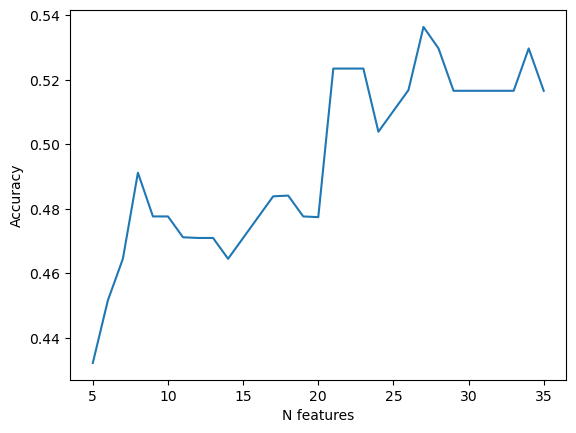

In [158]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [159]:
rfe = RFE(estimator =first_model, n_features_to_select = 27 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=9000), n_features_to_select=27)

In [160]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [161]:
featured_columns

['round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_ATdeep',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l3_ravg_ATp',
 'diff_points',
 'diff_ATT',
 'diff_MID',
 'diff_OVA']

In [162]:
X = s1920[featured_columns]

y = s1920[['FTR','round']]

In [163]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [164]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [165]:
confusion_matrix(y_test,rfe_pred)

array([[14,  0, 50],
       [ 4,  0, 31],
       [ 1,  0, 53]], dtype=int64)

In [166]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.74      0.22      0.34        64
           D       0.00      0.00      0.00        35
           H       0.40      0.98      0.56        54

    accuracy                           0.44       153
   macro avg       0.38      0.40      0.30       153
weighted avg       0.45      0.44      0.34       153



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [168]:
confusion_matrix(y_test,grid_model_pred)

array([[ 7,  0, 57],
       [ 0,  0, 35],
       [ 0,  0, 54]], dtype=int64)

In [169]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       1.00      0.11      0.20        64
           D       0.00      0.00      0.00        35
           H       0.37      1.00      0.54        54

    accuracy                           0.40       153
   macro avg       0.46      0.37      0.25       153
weighted avg       0.55      0.40      0.27       153



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best we could get is the base model accuracy of 0,44.

**From the above results it seems that this scenario isn't really well**

**Premier League**

In [81]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\premier_league.csv")

In [82]:
#We assign a unique value at every team of the league
team_id = {'Arsenal':1, 'Leicester':2, 'Man United':3, 'QPR':4, 'Stoke':5, 'West Brom':6,
           'West Ham':7, 'Liverpool':8, 'Newcastle':9, 'Burnley':10, 'Aston Villa':11,
           'Chelsea':12, 'Crystal Palace':13, 'Everton':14, 'Southampton':15, 'Swansea':16,
           'Hull':17, 'Sunderland':18, 'Tottenham':19, 'Man City':20, 'Bournemouth':21,
           'Norwich':22, 'Watford':23, 'Middlesbrough':24, 'Brighton':25, 'Huddersfield':26,
           'Fulham':27, 'Wolves':28, 'Cardiff':29, 'Sheffield United':30}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [83]:
#We are dropping the starts that are not available to us before the game 
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints','AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs','l5_ravg_HTgc', 'l5_ravg_ATgc',
              'HTL', 'ATL', 'ATD', 'ATW'],axis=1)

df = df.dropna()

In [84]:
s1415 = df[df['season']=='2014/2015'].drop('season',axis=1)
s1516 = df[df['season']=='2015/2016'].drop('season',axis=1)
s1617 = df[df['season']=='2016/2017'].drop('season',axis=1)
s1718 = df[df['season']=='2017/2018'].drop('season',axis=1)
s1819 = df[df['season']=='2018/2019'].drop('season',axis=1)
s1920 = df[df['season']=='2019/2020'].drop('season',axis=1)

**Season 1415**

In [106]:
X = s1415.drop('FTR',axis=1)
y = s1415[['FTR','round']]

In [107]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [108]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred =first_model.predict(scaled_X_test)

In [109]:
confusion_matrix(y_test,base_pred)

array([[38,  9, 12],
       [19,  2, 20],
       [36,  6, 48]], dtype=int64)

In [110]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.41      0.64      0.50        59
           D       0.12      0.05      0.07        41
           H       0.60      0.53      0.56        90

    accuracy                           0.46       190
   macro avg       0.38      0.41      0.38       190
weighted avg       0.44      0.46      0.44       190



It is intersting that the base model predicts the Away Wins better than the Home Wins.

 Clf result : 0.582, +- 0.059 N_features : 5
 Clf result : 0.572, +- 0.055 N_features : 6
 Clf result : 0.551, +- 0.076 N_features : 7
 Clf result : 0.546, +- 0.074 N_features : 8
 Clf result : 0.530, +- 0.087 N_features : 9
 Clf result : 0.562, +- 0.064 N_features : 10
 Clf result : 0.536, +- 0.059 N_features : 11
 Clf result : 0.567, +- 0.043 N_features : 12
 Clf result : 0.551, +- 0.046 N_features : 13
 Clf result : 0.541, +- 0.062 N_features : 14
 Clf result : 0.536, +- 0.064 N_features : 15
 Clf result : 0.536, +- 0.061 N_features : 16
 Clf result : 0.515, +- 0.075 N_features : 17
 Clf result : 0.515, +- 0.075 N_features : 18
 Clf result : 0.541, +- 0.057 N_features : 19
 Clf result : 0.551, +- 0.038 N_features : 20
 Clf result : 0.556, +- 0.034 N_features : 21
 Clf result : 0.556, +- 0.044 N_features : 22
 Clf result : 0.536, +- 0.053 N_features : 23
 Clf result : 0.536, +- 0.040 N_features : 24
 Clf result : 0.531, +- 0.041 N_features : 25
 Clf result : 0.525, +- 0.049 N_feature

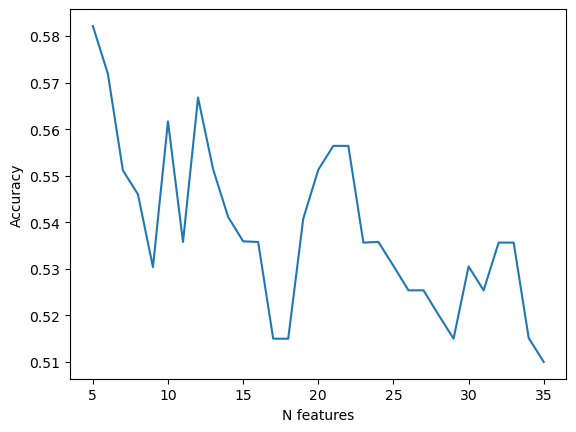

In [111]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                        shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [112]:
rfe = RFE(estimator =first_model, n_features_to_select = 5 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=9000, multi_class='multinomial'),
    n_features_to_select=5)

In [113]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [114]:
featured_columns


['AVGH', 'AVGD', 'l5_ravg_ATCR', 'l5_ravg_HTxG', 'avgHTP']

In [122]:
X = pd.concat([s1415[featured_columns],s1415['round']],axis=1) 

y = s1415[['FTR','round']]

In [123]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [124]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred =first_model.predict(scaled_X_test)

In [125]:
confusion_matrix(y_test,rfe_pred)

array([[29,  0, 30],
       [ 6,  0, 35],
       [15,  0, 75]], dtype=int64)

In [126]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.58      0.49      0.53        59
           D       0.00      0.00      0.00        41
           H       0.54      0.83      0.65        90

    accuracy                           0.55       190
   macro avg       0.37      0.44      0.39       190
weighted avg       0.43      0.55      0.47       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see the model in order to increase it's accuracy it is trying to predict better the **Home Wins** which is the dominant class.

In [127]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [128]:
grid_model.best_params_

{'C': 1.3433993325988987,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [129]:
confusion_matrix(y_test,grid_model_pred)

array([[32,  0, 27],
       [ 8,  0, 33],
       [15,  0, 75]], dtype=int64)

In [130]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.58      0.54      0.56        59
           D       0.00      0.00      0.00        41
           H       0.56      0.83      0.67        90

    accuracy                           0.56       190
   macro avg       0.38      0.46      0.41       190
weighted avg       0.44      0.56      0.49       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After the implementation of GridSearchCV we slightly improved the accuracy.

Best params: 
- 'C': 1.3433993325988987
- 'class_weight': None
- 'fit_intercept': True
- 'multi_class': 'multinomial'
- 'solver': 'newton-cg'

Features:
- 'AVGH' 
- 'AVGD' 
- 'l5_ravg_ATCR' 
- 'l5_ravg_HTxG' 
- 'avgHTP'

**Season 1516**

In [198]:
X = s1516.drop('FTR',axis=1)
y = s1516[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [200]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [201]:
confusion_matrix(y_test,base_pred)

array([[15, 17, 21],
       [ 7, 14, 32],
       [ 9, 15, 60]], dtype=int64)

In [202]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.48      0.28      0.36        53
           D       0.30      0.26      0.28        53
           H       0.53      0.71      0.61        84

    accuracy                           0.47       190
   macro avg       0.44      0.42      0.42       190
weighted avg       0.45      0.47      0.45       190



 Clf result : 0.464, +- 0.049 N_features : 5
 Clf result : 0.506, +- 0.052 N_features : 6
 Clf result : 0.480, +- 0.055 N_features : 7
 Clf result : 0.506, +- 0.040 N_features : 8
 Clf result : 0.506, +- 0.040 N_features : 9
 Clf result : 0.485, +- 0.066 N_features : 10
 Clf result : 0.495, +- 0.069 N_features : 11
 Clf result : 0.469, +- 0.051 N_features : 12
 Clf result : 0.474, +- 0.060 N_features : 13
 Clf result : 0.474, +- 0.054 N_features : 14
 Clf result : 0.449, +- 0.101 N_features : 15
 Clf result : 0.495, +- 0.072 N_features : 16
 Clf result : 0.474, +- 0.088 N_features : 17
 Clf result : 0.485, +- 0.086 N_features : 18
 Clf result : 0.484, +- 0.060 N_features : 19
 Clf result : 0.469, +- 0.067 N_features : 20
 Clf result : 0.474, +- 0.066 N_features : 21
 Clf result : 0.474, +- 0.057 N_features : 22
 Clf result : 0.459, +- 0.075 N_features : 23
 Clf result : 0.454, +- 0.075 N_features : 24
 Clf result : 0.448, +- 0.076 N_features : 25
 Clf result : 0.469, +- 0.082 N_feature

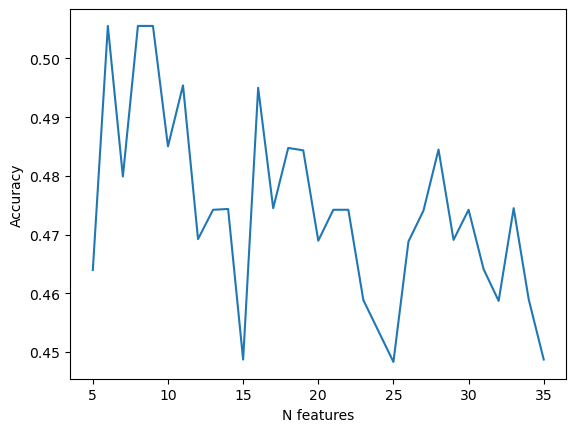

In [203]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [207]:
rfe = RFE(estimator =first_model, n_features_to_select = 8 , step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

RFE(estimator=LogisticRegression(max_iter=9000), n_features_to_select=8)

In [210]:
featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

In [211]:
featured_columns

['AVGD',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_atdiff',
 'avgHTP',
 'avgATP']

In [212]:
X = pd.concat([s1516[featured_columns],s1516['round']],axis=1) 

y = s1516[['FTR','round']]

In [213]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [215]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [216]:
confusion_matrix(y_test,rfe_pred)

array([[21,  3, 29],
       [15,  4, 34],
       [16,  1, 67]], dtype=int64)

In [217]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.40      0.40      0.40        53
           D       0.50      0.08      0.13        53
           H       0.52      0.80      0.63        84

    accuracy                           0.48       190
   macro avg       0.47      0.42      0.39       190
weighted avg       0.48      0.48      0.42       190



In [218]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [219]:
confusion_matrix(y_test,grid_model_pred)

array([[18,  2, 33],
       [15,  2, 36],
       [16,  0, 68]], dtype=int64)

In [220]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.37      0.34      0.35        53
           D       0.50      0.04      0.07        53
           H       0.50      0.81      0.62        84

    accuracy                           0.46       190
   macro avg       0.45      0.40      0.35       190
weighted avg       0.46      0.46      0.39       190



We couldn't improve the model any further after the implementation of RFE.

Features:
- AVGD
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_atdiff
- avgHTP
- avgATP

**Season 1617**

In [221]:
X = s1617.drop('FTR',axis=1)
y = s1617[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [222]:
first_model.fit(scaled_X_train,y_train.values.ravel())
first_model_pred = first_model.predict(scaled_X_test)

In [223]:
confusion_matrix(y_test,first_model_pred)

array([[27,  0, 26],
       [ 8,  0, 34],
       [ 6,  0, 89]], dtype=int64)

In [224]:
print(classification_report(y_test,first_model_pred))

              precision    recall  f1-score   support

           A       0.66      0.51      0.57        53
           D       0.00      0.00      0.00        42
           H       0.60      0.94      0.73        95

    accuracy                           0.61       190
   macro avg       0.42      0.48      0.43       190
weighted avg       0.48      0.61      0.53       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Clf result : 0.474, +- 0.023 N_features : 5
 Clf result : 0.464, +- 0.042 N_features : 6
 Clf result : 0.510, +- 0.050 N_features : 7
 Clf result : 0.546, +- 0.063 N_features : 8
 Clf result : 0.541, +- 0.058 N_features : 9
 Clf result : 0.541, +- 0.058 N_features : 10
 Clf result : 0.531, +- 0.044 N_features : 11
 Clf result : 0.557, +- 0.032 N_features : 12
 Clf result : 0.551, +- 0.038 N_features : 13
 Clf result : 0.557, +- 0.032 N_features : 14
 Clf result : 0.562, +- 0.031 N_features : 15
 Clf result : 0.572, +- 0.030 N_features : 16
 Clf result : 0.572, +- 0.030 N_features : 17
 Clf result : 0.577, +- 0.026 N_features : 18
 Clf result : 0.587, +- 0.035 N_features : 19
 Clf result : 0.567, +- 0.033 N_features : 20
 Clf result : 0.577, +- 0.038 N_features : 21
 Clf result : 0.577, +- 0.044 N_features : 22
 Clf result : 0.567, +- 0.043 N_features : 23
 Clf result : 0.557, +- 0.032 N_features : 24
 Clf result : 0.567, +- 0.046 N_features : 25
 Clf result : 0.562, +- 0.045 N_feature

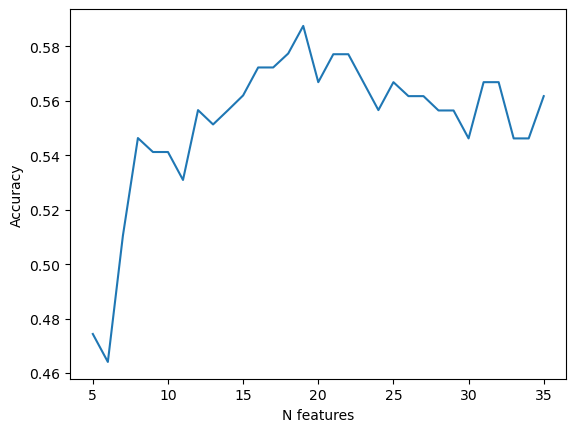

In [225]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [227]:
rfe = RFE(estimator =first_model, n_features_to_select = 19, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'diff_points',
 'diff_DEF']

In [228]:
X = s1617[featured_columns]

y = s1617[['FTR','round']]

In [229]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [230]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [232]:
confusion_matrix(y_test,rfe_pred)

array([[29,  0, 24],
       [ 9,  0, 33],
       [ 6,  0, 89]], dtype=int64)

In [233]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.66      0.55      0.60        53
           D       0.00      0.00      0.00        42
           H       0.61      0.94      0.74        95

    accuracy                           0.62       190
   macro avg       0.42      0.49      0.45       190
weighted avg       0.49      0.62      0.54       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After the implementation of RFE our model's accuracy increased to 0,62.

In [234]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [235]:
confusion_matrix(y_test,grid_model_pred)

array([[29,  0, 24],
       [ 9,  0, 33],
       [ 6,  0, 89]], dtype=int64)

In [236]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.66      0.55      0.60        53
           D       0.00      0.00      0.00        42
           H       0.61      0.94      0.74        95

    accuracy                           0.62       190
   macro avg       0.42      0.49      0.45       190
weighted avg       0.49      0.62      0.54       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best accuracy is that of the base model after the implementation of RFE.

Features:
- AVGH
- AVGD
- AVGA
- HT_draws
- AT_draws
- HT_losses
- AT_losses
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_HTxpts
- l5_ravg_ATxpts
- l5_htdiff
- l5_atdiff
- avgHTP
- avgATP
- diff_points
- diff_DEF

**Season 1718**

In [249]:
X = s1718.drop('FTR',axis=1)
y = s1718[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [239]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [240]:
confusion_matrix(y_test,base_pred)

array([[25, 19,  6],
       [10, 24, 18],
       [15, 27, 46]], dtype=int64)

In [241]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.50      0.50      0.50        50
           D       0.34      0.46      0.39        52
           H       0.66      0.52      0.58        88

    accuracy                           0.50       190
   macro avg       0.50      0.49      0.49       190
weighted avg       0.53      0.50      0.51       190



 Clf result : 0.521, +- 0.030 N_features : 5
 Clf result : 0.541, +- 0.035 N_features : 6
 Clf result : 0.541, +- 0.035 N_features : 7
 Clf result : 0.505, +- 0.032 N_features : 8
 Clf result : 0.526, +- 0.039 N_features : 9
 Clf result : 0.536, +- 0.031 N_features : 10
 Clf result : 0.504, +- 0.074 N_features : 11
 Clf result : 0.504, +- 0.077 N_features : 12
 Clf result : 0.499, +- 0.072 N_features : 13
 Clf result : 0.504, +- 0.074 N_features : 14
 Clf result : 0.504, +- 0.074 N_features : 15
 Clf result : 0.499, +- 0.070 N_features : 16
 Clf result : 0.504, +- 0.075 N_features : 17
 Clf result : 0.499, +- 0.074 N_features : 18
 Clf result : 0.515, +- 0.069 N_features : 19
 Clf result : 0.520, +- 0.071 N_features : 20
 Clf result : 0.504, +- 0.074 N_features : 21
 Clf result : 0.504, +- 0.077 N_features : 22
 Clf result : 0.504, +- 0.074 N_features : 23
 Clf result : 0.510, +- 0.077 N_features : 24
 Clf result : 0.515, +- 0.055 N_features : 25
 Clf result : 0.520, +- 0.066 N_feature

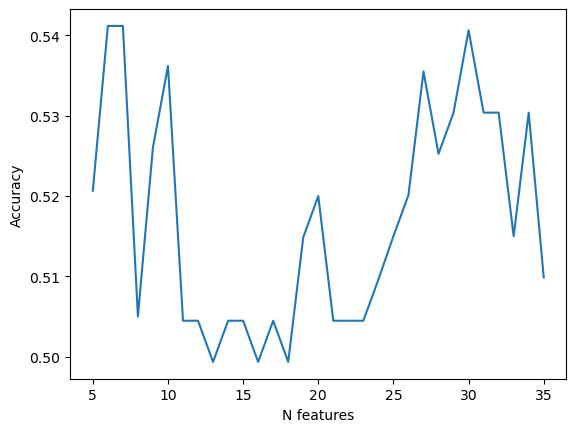

In [242]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [250]:
rfe = RFE(estimator =first_model, n_features_to_select = 30, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'AToveral',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_HTppda',
 'l5_ravg_ATppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l3_ravg_ATp',
 'diff_ATT',
 'diff_MID',
 'diff_OVA']

In [251]:
#X = pd.concat([s1718[featured_columns],s1718['round']],axis=1) 
X = s1718[featured_columns]
y = s1718[['FTR','round']]

In [252]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [253]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [254]:
confusion_matrix(y_test,rfe_pred)

array([[26, 19,  5],
       [ 8, 31, 13],
       [14, 30, 44]], dtype=int64)

In [255]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.54      0.52      0.53        50
           D       0.39      0.60      0.47        52
           H       0.71      0.50      0.59        88

    accuracy                           0.53       190
   macro avg       0.55      0.54      0.53       190
weighted avg       0.58      0.53      0.54       190



In [259]:
parameters = {'C': np.logspace(-3,3,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [260]:
confusion_matrix(y_test,grid_model_pred)

array([[26, 16,  8],
       [10, 15, 27],
       [17, 21, 50]], dtype=int64)

In [261]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.49      0.52      0.50        50
           D       0.29      0.29      0.29        52
           H       0.59      0.57      0.58        88

    accuracy                           0.48       190
   macro avg       0.46      0.46      0.46       190
weighted avg       0.48      0.48      0.48       190



The best accuracy we could get is that of the base model after the implementation of RFE. **It is very interesting that the model's recall at draws is better than that of the home and away wins**

Features:
- round
- AVGH
- AVGD
- HT_wins
- AT_wins
- HT_draws
- AT_draws
- HT_losses
- AT_losses
- l5_ravg_HTST
- l5_ravg_ATST
- l5_ravg_HTCR
- l5_ravg_ATCR
- AToveral
- l5_ravg_HTxG
- l5_ravg_ATxG
- 5_ravg_HTxpts
- l5_ravg_ATxpts
- l5_ravg_HTdeep
- l5_ravg_ATdeep
- l5_ravg_HTppda
- l5_ravg_ATppda
- l5_htdiff
- l5_atdiff
- avgHTP
- avgATP
- l3_ravg_ATp
- diff_ATT
- diff_MID
- diff_OVA

**Season 1819**

In [262]:
X = s1819.drop('FTR',axis=1)
y = s1819[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [264]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [265]:
confusion_matrix(y_test,base_pred)

array([[41,  0, 21],
       [11,  0, 22],
       [27,  0, 68]], dtype=int64)

In [266]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.52      0.66      0.58        62
           D       0.00      0.00      0.00        33
           H       0.61      0.72      0.66        95

    accuracy                           0.57       190
   macro avg       0.38      0.46      0.41       190
weighted avg       0.48      0.57      0.52       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Clf result : 0.552, +- 0.066 N_features : 5
 Clf result : 0.562, +- 0.058 N_features : 6
 Clf result : 0.547, +- 0.060 N_features : 7
 Clf result : 0.557, +- 0.049 N_features : 8
 Clf result : 0.557, +- 0.049 N_features : 9
 Clf result : 0.552, +- 0.088 N_features : 10
 Clf result : 0.547, +- 0.088 N_features : 11
 Clf result : 0.567, +- 0.040 N_features : 12
 Clf result : 0.577, +- 0.054 N_features : 13
 Clf result : 0.588, +- 0.053 N_features : 14
 Clf result : 0.593, +- 0.040 N_features : 15
 Clf result : 0.567, +- 0.040 N_features : 16
 Clf result : 0.551, +- 0.047 N_features : 17
 Clf result : 0.562, +- 0.046 N_features : 18
 Clf result : 0.561, +- 0.066 N_features : 19
 Clf result : 0.562, +- 0.059 N_features : 20
 Clf result : 0.562, +- 0.059 N_features : 21
 Clf result : 0.572, +- 0.056 N_features : 22
 Clf result : 0.582, +- 0.052 N_features : 23
 Clf result : 0.582, +- 0.052 N_features : 24
 Clf result : 0.577, +- 0.047 N_features : 25
 Clf result : 0.577, +- 0.050 N_feature

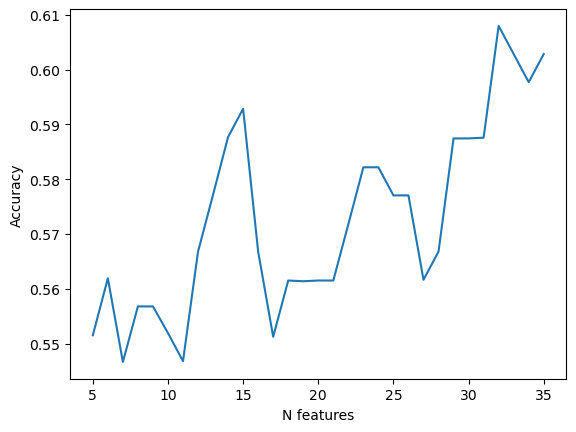

In [267]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [268]:
rfe = RFE(estimator =first_model, n_features_to_select = 32, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['AwayTeam',
 'round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'AToveral',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_ATppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_ATT',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [273]:
X = s1819[featured_columns]
y = s1819[['FTR','round']]

In [274]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [275]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [276]:
confusion_matrix(y_test,rfe_pred)

array([[41,  0, 21],
       [ 9,  1, 23],
       [28,  0, 67]], dtype=int64)

In [277]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.53      0.66      0.59        62
           D       1.00      0.03      0.06        33
           H       0.60      0.71      0.65        95

    accuracy                           0.57       190
   macro avg       0.71      0.47      0.43       190
weighted avg       0.65      0.57      0.53       190



In [281]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters, scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [282]:
confusion_matrix(y_test,grid_model_pred)

array([[37,  5, 20],
       [ 9,  2, 22],
       [31, 10, 54]], dtype=int64)

In [283]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.48      0.60      0.53        62
           D       0.12      0.06      0.08        33
           H       0.56      0.57      0.57        95

    accuracy                           0.49       190
   macro avg       0.39      0.41      0.39       190
weighted avg       0.46      0.49      0.47       190



**Season 1920**

In [33]:
X = s1920.drop('FTR',axis=1)
y = s1920[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [18]:
confusion_matrix(y_test,base_pred)

array([[44,  1, 10],
       [29,  0, 17],
       [42,  0, 47]], dtype=int64)

In [19]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.38      0.80      0.52        55
           D       0.00      0.00      0.00        46
           H       0.64      0.53      0.58        89

    accuracy                           0.48       190
   macro avg       0.34      0.44      0.36       190
weighted avg       0.41      0.48      0.42       190



 Clf result : 0.474, +- 0.011 N_features : 5
 Clf result : 0.505, +- 0.019 N_features : 6
 Clf result : 0.495, +- 0.046 N_features : 7
 Clf result : 0.464, +- 0.047 N_features : 8
 Clf result : 0.464, +- 0.035 N_features : 9
 Clf result : 0.505, +- 0.059 N_features : 10
 Clf result : 0.515, +- 0.046 N_features : 11
 Clf result : 0.500, +- 0.058 N_features : 12
 Clf result : 0.505, +- 0.053 N_features : 13
 Clf result : 0.515, +- 0.048 N_features : 14
 Clf result : 0.500, +- 0.064 N_features : 15
 Clf result : 0.495, +- 0.064 N_features : 16
 Clf result : 0.489, +- 0.065 N_features : 17
 Clf result : 0.489, +- 0.065 N_features : 18
 Clf result : 0.474, +- 0.075 N_features : 19
 Clf result : 0.469, +- 0.072 N_features : 20
 Clf result : 0.479, +- 0.061 N_features : 21
 Clf result : 0.484, +- 0.068 N_features : 22
 Clf result : 0.489, +- 0.071 N_features : 23
 Clf result : 0.484, +- 0.064 N_features : 24
 Clf result : 0.479, +- 0.068 N_features : 25
 Clf result : 0.484, +- 0.075 N_feature

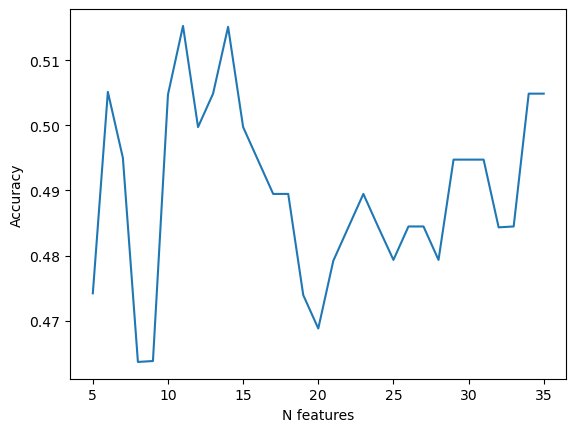

In [20]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [34]:
rfe = RFE(estimator =first_model, n_features_to_select = 34, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'AToveral',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_HTppda',
 'l5_ravg_ATppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_points',
 'diff_ATT',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [35]:
X = s1819[featured_columns]
y = s1819[['FTR','round']]

In [36]:
X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [37]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [38]:
confusion_matrix(y_test,rfe_pred)

array([[40,  0, 22],
       [10,  1, 22],
       [28,  0, 67]], dtype=int64)

In [39]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.51      0.65      0.57        62
           D       1.00      0.03      0.06        33
           H       0.60      0.71      0.65        95

    accuracy                           0.57       190
   macro avg       0.71      0.46      0.43       190
weighted avg       0.64      0.57      0.52       190



In [40]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters)

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [41]:
grid_model.best_params_

{'C': 2.424462017082326,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [42]:
confusion_matrix(y_test,grid_model_pred)

array([[47,  1, 14],
       [15,  1, 17],
       [34,  4, 57]], dtype=int64)

In [30]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.49      0.65      0.56        62
           D       0.00      0.00      0.00        33
           H       0.62      0.71      0.66        95

    accuracy                           0.56       190
   macro avg       0.37      0.45      0.41       190
weighted avg       0.47      0.56      0.51       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best accuracy we could get is 0,56. A very interesting thing is that it didn't take into consideration the betting odds.
The reason I chose 34 features is that it gave better results.

HyperParameters:
- 'C': 0.22854638641349884
- 'class_weight': None
- 'fit_intercept': True
- 'multi_class': 'multinomial'
- 'solver': 'newton-cg'

Features:
- AVGH
- AVGD
- AVGA
- HT_wins
- AT_wins
- HT_draws
- AT_draws
- HT_losses
- AT_losses
- l5_ravg_HTST
- l5_ravg_ATST
- l5_ravg_HTCR
- l5_ravg_ATCR
- AToveral
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_HTxpts
- l5_ravg_ATxpts
- l5_ravg_HTdeep
- l5_ravg_ATdeep
- l5_ravg_HTppda
- l5_ravg_ATppda
- l5_htdiff
- l5_atdiff
- avgHTP
- avgATP
- l5_ravg_HTp
- l3_ravg_ATp
- diff_points
- diff_ATT
- diff_MID
- diff_DEF
- diff_OVA

**Serie A**

In [58]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\serie_a.csv")

In [59]:
#We assign a unique value at every team of the league
team_id = {'Chievo':1, 'Roma':2, 'Atalanta':3, 'Cesena':4, 'Genoa':5, 'Milan':6,
           'Palermo':7, 'Sassuolo':8, 'Torino':9, 'Udinese':10, 'Empoli':11, 'Juventus':12,
           'Cagliari':13, 'Fiorentina':14, 'Inter':15, 'Lazio':16, 'Napoli':17, 'Parma':18,
           'Sampdoria':19, 'Verona':20, 'Frosinone':21, 'Bologna':22, 'Carpi':23, 'Pescara':24,
           'Crotone':25, 'Benevento':26, 'Spal':27, 'Lecce':28, 'Brescia':29}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [60]:
#We are dropping the starts that are not available to us before the game 
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints','AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs','l5_ravg_HTgc', 'l5_ravg_ATgc',
              'HTL', 'ATL', 'ATD', 'ATW'],axis=1)

df = df.dropna()

In [61]:
s1415 = df[df['season']=='2014/2015'].drop('season',axis=1)
s1516 = df[df['season']=='2015/2016'].drop('season',axis=1)
s1617 = df[df['season']=='2016/2017'].drop('season',axis=1)
s1718 = df[df['season']=='2017/2018'].drop('season',axis=1)
s1819 = df[df['season']=='2018/2019'].drop('season',axis=1)
s1920 = df[df['season']=='2019/2020'].drop('season',axis=1)

**Season 1415**

In [135]:
X = s1415.drop('FTR',axis=1)
y = s1415[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [136]:
y_test

,FTR
190,H
191,H
192,D
193,A
194,H
...,...
375,A
376,A
377,D
378,H


In [137]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [138]:
confusion_matrix(y_test,base_pred)

array([[18, 34,  1],
       [14, 38,  2],
       [11, 68,  4]], dtype=int64)

In [139]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.42      0.34      0.37        53
           D       0.27      0.70      0.39        54
           H       0.57      0.05      0.09        83

    accuracy                           0.32       190
   macro avg       0.42      0.36      0.29       190
weighted avg       0.44      0.32      0.25       190



 Clf result : 0.469, +- 0.077 N_features : 5
 Clf result : 0.423, +- 0.050 N_features : 6
 Clf result : 0.407, +- 0.029 N_features : 7
 Clf result : 0.412, +- 0.045 N_features : 8
 Clf result : 0.438, +- 0.066 N_features : 9
 Clf result : 0.433, +- 0.047 N_features : 10
 Clf result : 0.480, +- 0.063 N_features : 11
 Clf result : 0.490, +- 0.052 N_features : 12
 Clf result : 0.469, +- 0.059 N_features : 13
 Clf result : 0.490, +- 0.026 N_features : 14
 Clf result : 0.505, +- 0.022 N_features : 15
 Clf result : 0.500, +- 0.023 N_features : 16
 Clf result : 0.516, +- 0.029 N_features : 17
 Clf result : 0.516, +- 0.037 N_features : 18
 Clf result : 0.510, +- 0.035 N_features : 19
 Clf result : 0.495, +- 0.054 N_features : 20
 Clf result : 0.505, +- 0.043 N_features : 21
 Clf result : 0.505, +- 0.043 N_features : 22
 Clf result : 0.495, +- 0.051 N_features : 23
 Clf result : 0.510, +- 0.035 N_features : 24
 Clf result : 0.510, +- 0.042 N_features : 25
 Clf result : 0.500, +- 0.046 N_feature

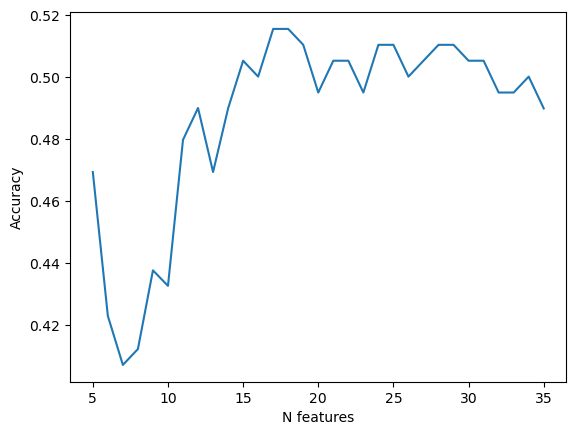

In [140]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [141]:
rfe = RFE(estimator =first_model, n_features_to_select = 18, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_ATxpts',
 'l5_ravg_ATppda',
 'avgHTP',
 'avgATP',
 'l3_ravg_ATp',
 'diff_DEF']

In [142]:
X = s1415[featured_columns]
y = s1415[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [143]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [144]:
confusion_matrix(y_test,rfe_pred)

array([[17, 35,  1],
       [ 9, 44,  1],
       [11, 69,  3]], dtype=int64)

In [145]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.46      0.32      0.38        53
           D       0.30      0.81      0.44        54
           H       0.60      0.04      0.07        83

    accuracy                           0.34       190
   macro avg       0.45      0.39      0.29       190
weighted avg       0.47      0.34      0.26       190



In [146]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [149]:
grid_model.best_params_

{'C': 492.38826317067316,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [147]:
confusion_matrix(y_test,grid_model_pred)

array([[23, 29,  1],
       [15, 39,  0],
       [18, 60,  5]], dtype=int64)

In [148]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.41      0.43      0.42        53
           D       0.30      0.72      0.43        54
           H       0.83      0.06      0.11        83

    accuracy                           0.35       190
   macro avg       0.52      0.41      0.32       190
weighted avg       0.57      0.35      0.29       190



The model seems to work really bad.

**Season 1516**

In [150]:
X = s1516.drop('FTR',axis=1)
y = s1516[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [151]:
first_model.fit(scaled_X_train,y_train.values.ravel())

LogisticRegression(max_iter=9000, multi_class='multinomial')

In [152]:
base_pred = first_model.predict(scaled_X_test)

In [153]:
confusion_matrix(y_test,base_pred)

array([[47,  1,  0],
       [50,  0,  3],
       [74,  2, 13]], dtype=int64)

In [154]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.27      0.98      0.43        48
           D       0.00      0.00      0.00        53
           H       0.81      0.15      0.25        89

    accuracy                           0.32       190
   macro avg       0.36      0.38      0.23       190
weighted avg       0.45      0.32      0.22       190



 Clf result : 0.531, +- 0.060 N_features : 5
 Clf result : 0.506, +- 0.072 N_features : 6
 Clf result : 0.510, +- 0.073 N_features : 7
 Clf result : 0.504, +- 0.074 N_features : 8
 Clf result : 0.525, +- 0.067 N_features : 9
 Clf result : 0.530, +- 0.064 N_features : 10
 Clf result : 0.515, +- 0.065 N_features : 11
 Clf result : 0.510, +- 0.064 N_features : 12
 Clf result : 0.515, +- 0.055 N_features : 13
 Clf result : 0.489, +- 0.056 N_features : 14
 Clf result : 0.469, +- 0.061 N_features : 15
 Clf result : 0.499, +- 0.058 N_features : 16
 Clf result : 0.515, +- 0.059 N_features : 17
 Clf result : 0.489, +- 0.074 N_features : 18
 Clf result : 0.489, +- 0.068 N_features : 19
 Clf result : 0.479, +- 0.075 N_features : 20
 Clf result : 0.479, +- 0.075 N_features : 21
 Clf result : 0.474, +- 0.071 N_features : 22
 Clf result : 0.484, +- 0.079 N_features : 23
 Clf result : 0.479, +- 0.057 N_features : 24
 Clf result : 0.474, +- 0.059 N_features : 25
 Clf result : 0.494, +- 0.087 N_feature

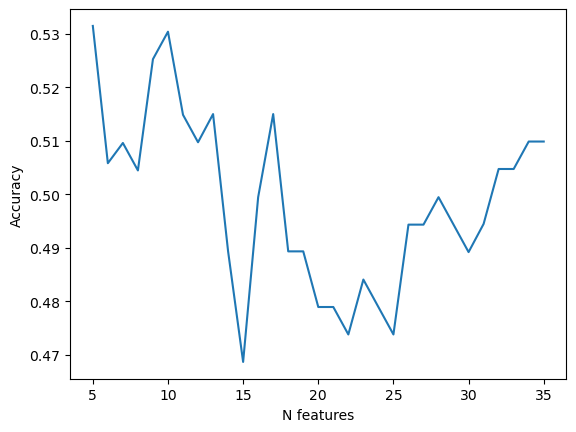

In [155]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [156]:
rfe = RFE(estimator =first_model, n_features_to_select = 5, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['AVGH', 'AVGD', 'l5_ravg_HTCR', 'l5_ravg_ATCR', 'avgATP']

In [159]:
X = pd.concat([s1516[featured_columns],s1516['round']],axis=1)
y = s1516[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [160]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred =first_model.predict(scaled_X_test)

In [161]:
confusion_matrix(y_test,rfe_pred)

array([[28,  0, 20],
       [26,  0, 27],
       [25,  0, 64]], dtype=int64)

In [162]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.35      0.58      0.44        48
           D       0.00      0.00      0.00        53
           H       0.58      0.72      0.64        89

    accuracy                           0.48       190
   macro avg       0.31      0.43      0.36       190
weighted avg       0.36      0.48      0.41       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [166]:
grid_model.best_params_

{'C': 0.4124626382901348,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [164]:
confusion_matrix(y_test,grid_model_pred)

array([[30,  0, 18],
       [27,  0, 26],
       [26,  0, 63]], dtype=int64)

In [165]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.36      0.62      0.46        48
           D       0.00      0.00      0.00        53
           H       0.59      0.71      0.64        89

    accuracy                           0.49       190
   macro avg       0.32      0.44      0.37       190
weighted avg       0.37      0.49      0.42       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best accuracy we could get is 0,49.

Parameters:
- 'C': 0.4124626382901348
- 'class_weight': None
- 'fit_intercept': False
- 'multi_class': 'multinomial'
- 'solver': 'newton-cg'

Features:
- AVGH  
- AVGD 
- l5_ravg_HTCR 
- l5_ravg_ATCR 
- avgATP

**Season 1617**

In [177]:
X = s1617.drop('FTR',axis=1)
y = s1617[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [178]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [179]:
confusion_matrix(y_test,base_pred)

array([[38,  0, 26],
       [15,  0, 27],
       [18,  0, 66]], dtype=int64)

In [180]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.54      0.59      0.56        64
           D       0.00      0.00      0.00        42
           H       0.55      0.79      0.65        84

    accuracy                           0.55       190
   macro avg       0.36      0.46      0.40       190
weighted avg       0.43      0.55      0.48       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Clf result : 0.577, +- 0.066 N_features : 5
 Clf result : 0.629, +- 0.069 N_features : 6
 Clf result : 0.608, +- 0.060 N_features : 7
 Clf result : 0.587, +- 0.066 N_features : 8
 Clf result : 0.592, +- 0.055 N_features : 9
 Clf result : 0.593, +- 0.051 N_features : 10
 Clf result : 0.598, +- 0.039 N_features : 11
 Clf result : 0.613, +- 0.044 N_features : 12
 Clf result : 0.603, +- 0.055 N_features : 13
 Clf result : 0.618, +- 0.062 N_features : 14
 Clf result : 0.618, +- 0.052 N_features : 15
 Clf result : 0.623, +- 0.068 N_features : 16
 Clf result : 0.629, +- 0.075 N_features : 17
 Clf result : 0.644, +- 0.065 N_features : 18
 Clf result : 0.654, +- 0.044 N_features : 19
 Clf result : 0.654, +- 0.034 N_features : 20
 Clf result : 0.660, +- 0.043 N_features : 21
 Clf result : 0.660, +- 0.043 N_features : 22
 Clf result : 0.644, +- 0.055 N_features : 23
 Clf result : 0.634, +- 0.060 N_features : 24
 Clf result : 0.644, +- 0.056 N_features : 25
 Clf result : 0.644, +- 0.056 N_feature

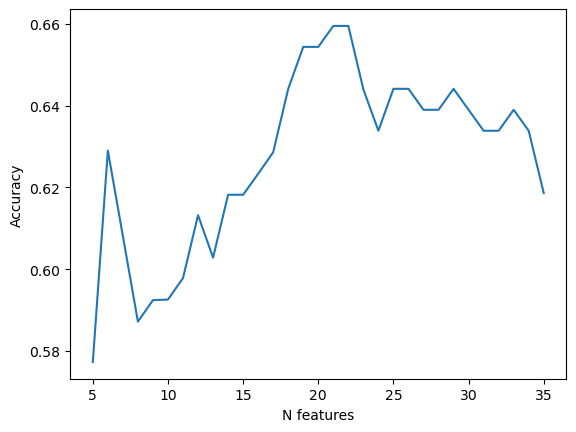

In [171]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [181]:
rfe = RFE(estimator =first_model, n_features_to_select = 22, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATdeep',
 'l5_htdiff',
 'avgHTP',
 'avgATP',
 'diff_ATT',
 'diff_MID',
 'diff_OVA']

In [182]:
X = s1617[featured_columns]
y = s1617[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [183]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [184]:
confusion_matrix(y_test,rfe_pred)

array([[36,  0, 28],
       [16,  0, 26],
       [16,  0, 68]], dtype=int64)

In [185]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.53      0.56      0.55        64
           D       0.00      0.00      0.00        42
           H       0.56      0.81      0.66        84

    accuracy                           0.55       190
   macro avg       0.36      0.46      0.40       190
weighted avg       0.42      0.55      0.48       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [187]:
grid_model.best_params_

{'C': 1.3433993325988987,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'ovr',
 'solver': 'newton-cg'}

In [188]:
confusion_matrix(y_test,grid_model_pred)

array([[41,  0, 23],
       [20,  0, 22],
       [24,  0, 60]], dtype=int64)

In [189]:
print(classification_reportication_reportication_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.48      0.64      0.55        64
           D       0.00      0.00      0.00        42
           H       0.57      0.71      0.63        84

    accuracy                           0.53       190
   macro avg       0.35      0.45      0.40       190
weighted avg       0.42      0.53      0.47       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best accuracy we could get is 0,55 after the feature reduction.

Features:
- AVGH
- AVGD
- AVGA
- HT_wins
- AT_wins
- HT_draws
- AT_draws
- HT_losses
- AT_losses
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_HTxpts
- l5_ravg_ATdeep
- l5_htdiff
- avgHTP
- avgATP
- diff_ATT
- diff_MID
- diff_OVA

**Season 17/18**

In [62]:
X = s1718.drop('FTR',axis=1)
y = s1718[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [63]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [64]:
confusion_matrix(y_test,base_pred)

array([[19, 39,  5],
       [10, 25,  6],
       [10, 48, 28]], dtype=int64)

In [65]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.49      0.30      0.37        63
           D       0.22      0.61      0.33        41
           H       0.72      0.33      0.45        86

    accuracy                           0.38       190
   macro avg       0.48      0.41      0.38       190
weighted avg       0.53      0.38      0.40       190



 Clf result : 0.521, +- 0.072 N_features : 5
 Clf result : 0.531, +- 0.074 N_features : 6
 Clf result : 0.531, +- 0.060 N_features : 7
 Clf result : 0.547, +- 0.040 N_features : 8
 Clf result : 0.552, +- 0.045 N_features : 9
 Clf result : 0.547, +- 0.054 N_features : 10
 Clf result : 0.557, +- 0.043 N_features : 11
 Clf result : 0.552, +- 0.070 N_features : 12
 Clf result : 0.562, +- 0.061 N_features : 13
 Clf result : 0.583, +- 0.042 N_features : 14
 Clf result : 0.577, +- 0.037 N_features : 15
 Clf result : 0.572, +- 0.046 N_features : 16
 Clf result : 0.572, +- 0.046 N_features : 17
 Clf result : 0.572, +- 0.040 N_features : 18
 Clf result : 0.577, +- 0.026 N_features : 19
 Clf result : 0.583, +- 0.043 N_features : 20
 Clf result : 0.583, +- 0.043 N_features : 21
 Clf result : 0.583, +- 0.043 N_features : 22
 Clf result : 0.588, +- 0.035 N_features : 23
 Clf result : 0.583, +- 0.043 N_features : 24
 Clf result : 0.588, +- 0.044 N_features : 25
 Clf result : 0.588, +- 0.044 N_feature

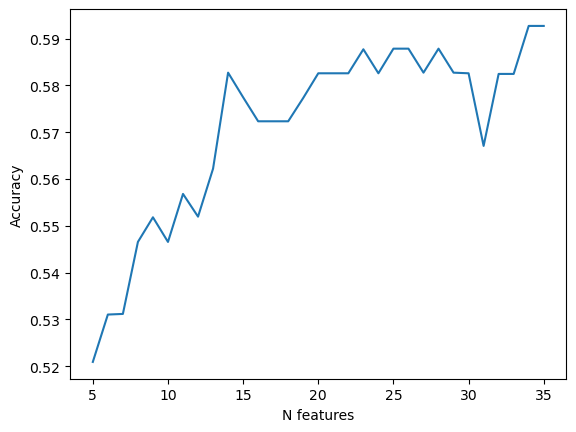

In [66]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [67]:
rfe = RFE(estimator =first_model, n_features_to_select = 34, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['HomeTeam',
 'round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'HToveral',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_HTppda',
 'l5_ravg_ATppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_points',
 'diff_ATT',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [68]:
X = s1718[featured_columns]
y = s1718[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [69]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [70]:
confusion_matrix(y_test,rfe_pred)

array([[20, 39,  4],
       [10, 28,  3],
       [12, 48, 26]], dtype=int64)

In [71]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.48      0.32      0.38        63
           D       0.24      0.68      0.36        41
           H       0.79      0.30      0.44        86

    accuracy                           0.39       190
   macro avg       0.50      0.43      0.39       190
weighted avg       0.57      0.39      0.40       190



In [72]:
parameters = {'C': np.logspace(-5,5,20), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [73]:
grid_model.best_params_

{'C': 0.5455594781168515,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'ovr',
 'solver': 'newton-cg'}

In [75]:
confusion_matrix(y_test,grid_model_pred)

array([[24, 34,  5],
       [13, 21,  7],
       [13, 36, 37]], dtype=int64)

In [76]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.48      0.38      0.42        63
           D       0.23      0.51      0.32        41
           H       0.76      0.43      0.55        86

    accuracy                           0.43       190
   macro avg       0.49      0.44      0.43       190
weighted avg       0.55      0.43      0.46       190



**Season 1819**

In [190]:
X = s1819.drop('FTR',axis=1)
y = s1819[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [191]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [192]:
confusion_matrix(y_test,base_pred)

array([[ 6, 37, 12],
       [ 3, 25, 24],
       [ 2, 31, 50]], dtype=int64)

In [193]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.55      0.11      0.18        55
           D       0.27      0.48      0.34        52
           H       0.58      0.60      0.59        83

    accuracy                           0.43       190
   macro avg       0.47      0.40      0.37       190
weighted avg       0.49      0.43      0.41       190



 Clf result : 0.572, +- 0.060 N_features : 5
 Clf result : 0.556, +- 0.081 N_features : 6
 Clf result : 0.556, +- 0.092 N_features : 7
 Clf result : 0.556, +- 0.085 N_features : 8
 Clf result : 0.587, +- 0.060 N_features : 9
 Clf result : 0.592, +- 0.047 N_features : 10
 Clf result : 0.598, +- 0.039 N_features : 11
 Clf result : 0.608, +- 0.064 N_features : 12
 Clf result : 0.597, +- 0.073 N_features : 13
 Clf result : 0.618, +- 0.080 N_features : 14
 Clf result : 0.603, +- 0.066 N_features : 15
 Clf result : 0.597, +- 0.055 N_features : 16
 Clf result : 0.592, +- 0.049 N_features : 17
 Clf result : 0.587, +- 0.050 N_features : 18
 Clf result : 0.603, +- 0.057 N_features : 19
 Clf result : 0.592, +- 0.054 N_features : 20
 Clf result : 0.603, +- 0.057 N_features : 21
 Clf result : 0.603, +- 0.057 N_features : 22
 Clf result : 0.603, +- 0.064 N_features : 23
 Clf result : 0.608, +- 0.073 N_features : 24
 Clf result : 0.603, +- 0.072 N_features : 25
 Clf result : 0.603, +- 0.066 N_feature

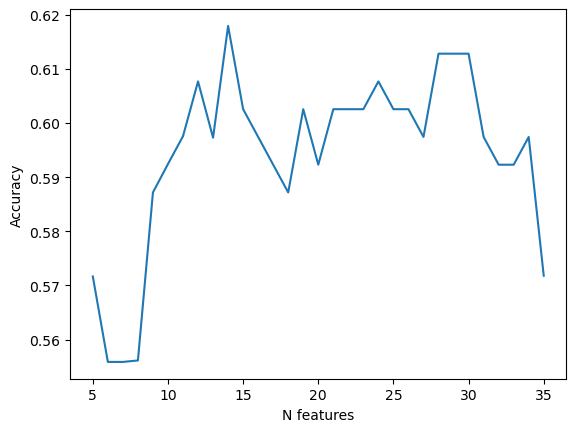

In [194]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [195]:
rfe = RFE(estimator =first_model, n_features_to_select = 14, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_ATxpts',
 'l5_htdiff',
 'avgHTP',
 'avgATP',
 'diff_DEF',
 'diff_OVA']

In [206]:
X = s1819[featured_columns]
y = s1819[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [207]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [208]:
confusion_matrix(y_test,rfe_pred)

array([[15, 31,  9],
       [ 4, 29, 19],
       [ 4, 28, 51]], dtype=int64)

In [209]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.65      0.27      0.38        55
           D       0.33      0.56      0.41        52
           H       0.65      0.61      0.63        83

    accuracy                           0.50       190
   macro avg       0.54      0.48      0.48       190
weighted avg       0.56      0.50      0.50       190



In [210]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [213]:
grid_model.best_params_

{'C': 0.22854638641349884,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [211]:
confusion_matrix(y_test,grid_model_pred)

array([[16, 25, 14],
       [ 3, 20, 29],
       [ 5, 23, 55]], dtype=int64)

In [212]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.67      0.29      0.41        55
           D       0.29      0.38      0.33        52
           H       0.56      0.66      0.61        83

    accuracy                           0.48       190
   macro avg       0.51      0.45      0.45       190
weighted avg       0.52      0.48      0.47       190



Best accuracy we could get is 0,50 after feature reduction.

Features:
- AVGH
- AVGD
- l5_ravg_ATST
- l5_ravg_HTCR
- l5_ravg_ATCR
- l5_ravg_HTxG
- l5_ravg_ATxG
- l5_ravg_ATxpts
- l5_htdiff
- avgHTP
- avgATP
- diff_DEF
- diff_OVA'

**Season 1920**

In [227]:
X = s1920.drop('FTR',axis=1)
y = s1920[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [215]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [216]:
confusion_matrix(y_test,base_pred)

array([[52,  3, 12],
       [28,  1, 14],
       [33,  2, 45]], dtype=int64)

In [217]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.46      0.78      0.58        67
           D       0.17      0.02      0.04        43
           H       0.63      0.56      0.60        80

    accuracy                           0.52       190
   macro avg       0.42      0.45      0.40       190
weighted avg       0.47      0.52      0.46       190



 Clf result : 0.494, +- 0.046 N_features : 5
 Clf result : 0.494, +- 0.056 N_features : 6
 Clf result : 0.505, +- 0.062 N_features : 7
 Clf result : 0.494, +- 0.051 N_features : 8
 Clf result : 0.494, +- 0.040 N_features : 9
 Clf result : 0.510, +- 0.031 N_features : 10
 Clf result : 0.490, +- 0.045 N_features : 11
 Clf result : 0.454, +- 0.028 N_features : 12
 Clf result : 0.469, +- 0.040 N_features : 13
 Clf result : 0.469, +- 0.043 N_features : 14
 Clf result : 0.479, +- 0.034 N_features : 15
 Clf result : 0.490, +- 0.035 N_features : 16
 Clf result : 0.490, +- 0.042 N_features : 17
 Clf result : 0.495, +- 0.036 N_features : 18
 Clf result : 0.515, +- 0.033 N_features : 19
 Clf result : 0.510, +- 0.035 N_features : 20
 Clf result : 0.505, +- 0.048 N_features : 21
 Clf result : 0.505, +- 0.048 N_features : 22
 Clf result : 0.510, +- 0.055 N_features : 23
 Clf result : 0.521, +- 0.039 N_features : 24
 Clf result : 0.515, +- 0.031 N_features : 25
 Clf result : 0.531, +- 0.039 N_feature

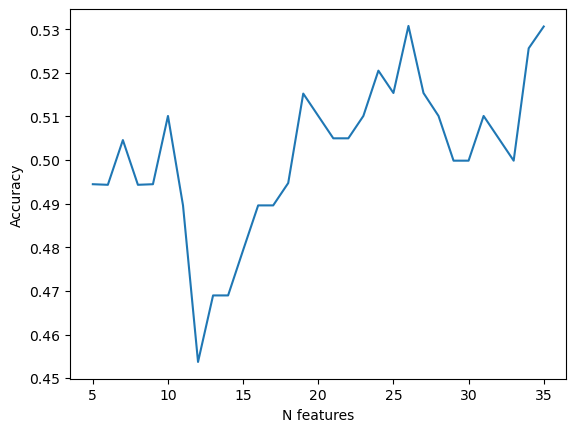

In [218]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [228]:
rfe = RFE(estimator =first_model, n_features_to_select = 35, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['HomeTeam',
 'round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'HT_losses',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'HToveral',
 'AToveral',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_HTppda',
 'l5_ravg_ATppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_points',
 'diff_ATT',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [230]:
X = s1920[featured_columns]
y = s1920[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [231]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [232]:
confusion_matrix(y_test,rfe_pred)

array([[53,  1, 13],
       [28,  1, 14],
       [34,  2, 44]], dtype=int64)

In [233]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.46      0.79      0.58        67
           D       0.25      0.02      0.04        43
           H       0.62      0.55      0.58        80

    accuracy                           0.52       190
   macro avg       0.44      0.45      0.40       190
weighted avg       0.48      0.52      0.46       190



In [234]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [235]:
confusion_matrix(y_test,grid_model_pred)

array([[50,  0, 17],
       [31,  0, 12],
       [28,  0, 52]], dtype=int64)

In [236]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.46      0.75      0.57        67
           D       0.00      0.00      0.00        43
           H       0.64      0.65      0.65        80

    accuracy                           0.54       190
   macro avg       0.37      0.47      0.40       190
weighted avg       0.43      0.54      0.47       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**La Liga**

In [11]:
df = pd.read_csv(r"C:\Users\George\Desktop\football-match-prediction-using-ml-techniques\fe\la_liga.csv")

In [12]:
#We assign a unique value at every team of the league
team_id = {'Almeria':1, 'Granada':2, 'Malaga':3, 'Sevilla':4, 'Barcelona':5, 'Celta':6,
           'Eibar':7, 'Levante':8, 'Real Madrid':9, 'Vallecano':10, 'Getafe':11,
           'Valencia':12, 'Ath Bilbao':13, 'Ath Madrid':14, 'Cordoba':15, 'Espanol':16,
           'Elche':17, 'La Coruna':18, 'Sociedad':19, 'Villarreal':20, 'Betis':21,
           'Sp Gijon':22, 'Las Palmas':23, 'Leganes':24, 'Osasuna':25, 'Alaves':26, 'Girona':27,
           'Valladolid':28, 'Huesca':29, 'Mallorca':30}

for key,value in df.iteritems():
    df['HomeTeam'] = df['HomeTeam'].apply(lambda x: team_id.get(x,x))
    
for key,value in df.iteritems():
    df['AwayTeam'] = df['AwayTeam'].apply(lambda x: team_id.get(x,x))

In [13]:
#We are dropping the starts that are not available to us before the game 
df = df.drop(['Unnamed: 0', 'Date','FTHG', 'FTAG', 'HTHG','HTAG','league', 'Hppda_coef', 'Appda_coef','HTW', 'HTD',
              'HTCR', 'ATCR','HTGS','HTxpts', 'ATxpts','ATGS', 'HTGC', 'ATGC','HTOVA_S', 'HTatt_S', 'HomeTeamPoints','AwayTeamPoints',
              'HTmid_S','HTdef_S', 'ATOVA_S', 'ATatt_S','ATmid_S','ATdef_S','l5_ravg_HTgs', 'l5_ravg_ATgs','l5_ravg_HTgc', 'l5_ravg_ATgc',
              'HTL', 'ATL', 'ATD', 'ATW'],axis=1)

df = df.dropna()

In [14]:
s1415 = df[df['season']=='2014/2015'].drop('season',axis=1)
s1516 = df[df['season']=='2015/2016'].drop('season',axis=1)
s1617 = df[df['season']=='2016/2017'].drop('season',axis=1)
s1718 = df[df['season']=='2017/2018'].drop('season',axis=1)
s1819 = df[df['season']=='2018/2019'].drop('season',axis=1)
s1920 = df[df['season']=='2019/2020'].drop('season',axis=1)

**Season 1415**

In [241]:
X = s1415.drop('FTR',axis=1)
y = s1415[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [242]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [243]:
confusion_matrix(y_test,base_pred)

array([[33,  9, 14],
       [14,  8, 22],
       [24,  7, 59]], dtype=int64)

In [244]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.46      0.59      0.52        56
           D       0.33      0.18      0.24        44
           H       0.62      0.66      0.64        90

    accuracy                           0.53       190
   macro avg       0.47      0.48      0.46       190
weighted avg       0.51      0.53      0.51       190



 Clf result : 0.531, +- 0.057 N_features : 5
 Clf result : 0.520, +- 0.055 N_features : 6
 Clf result : 0.546, +- 0.058 N_features : 7
 Clf result : 0.556, +- 0.064 N_features : 8
 Clf result : 0.567, +- 0.057 N_features : 9
 Clf result : 0.587, +- 0.080 N_features : 10
 Clf result : 0.592, +- 0.055 N_features : 11
 Clf result : 0.577, +- 0.059 N_features : 12
 Clf result : 0.572, +- 0.064 N_features : 13
 Clf result : 0.562, +- 0.031 N_features : 14
 Clf result : 0.551, +- 0.023 N_features : 15
 Clf result : 0.572, +- 0.036 N_features : 16
 Clf result : 0.572, +- 0.036 N_features : 17
 Clf result : 0.582, +- 0.056 N_features : 18
 Clf result : 0.582, +- 0.056 N_features : 19
 Clf result : 0.577, +- 0.061 N_features : 20
 Clf result : 0.582, +- 0.045 N_features : 21
 Clf result : 0.582, +- 0.034 N_features : 22
 Clf result : 0.582, +- 0.034 N_features : 23
 Clf result : 0.582, +- 0.034 N_features : 24
 Clf result : 0.562, +- 0.021 N_features : 25
 Clf result : 0.552, +- 0.037 N_feature

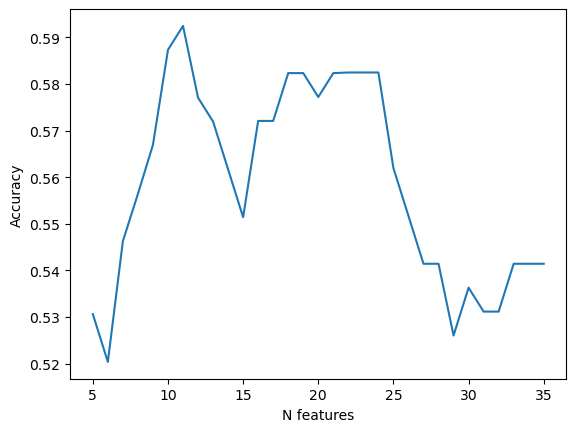

In [245]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [246]:
rfe = RFE(estimator =first_model, n_features_to_select = 11, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'avgHTP',
 'avgATP',
 'diff_OVA']

In [248]:
X = s1415[featured_columns]
y = s1415[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [251]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [252]:
confusion_matrix(y_test,base_pred)

array([[31,  5, 20],
       [ 9,  5, 30],
       [12,  6, 72]], dtype=int64)

In [253]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.60      0.55      0.57        56
           D       0.31      0.11      0.17        44
           H       0.59      0.80      0.68        90

    accuracy                           0.57       190
   macro avg       0.50      0.49      0.47       190
weighted avg       0.53      0.57      0.53       190



With the implementation of RFE we managed to increase the accuracy of the model by 0,4.

In [254]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [255]:
grid_model.best_params_

{'C': 1603.7187437513276,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'multi_class': 'ovr',
 'solver': 'saga'}

In [256]:
confusion_matrix(y_test,grid_model_pred)

array([[27, 17, 12],
       [11, 15, 18],
       [ 8, 22, 60]], dtype=int64)

In [257]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.59      0.48      0.53        56
           D       0.28      0.34      0.31        44
           H       0.67      0.67      0.67        90

    accuracy                           0.54       190
   macro avg       0.51      0.50      0.50       190
weighted avg       0.55      0.54      0.54       190



The best accuracy we could get is 0,57 implementing the base model after the feature redctuion.

Features:
- 'AVGH'
- 'AVGD'
- 'l5_ravg_ATST'
- 'l5_ravg_HTCR'
- 'l5_ravg_HTxG'
- 'l5_ravg_ATxG'
- 'l5_ravg_HTxpts'
- 'avgHTP'
- 'avgATP'
- 'diff_OVA'

**Season 1516**

In [258]:
X = s1516.drop('FTR',axis=1)
y = s1516[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [259]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [260]:
confusion_matrix(y_test,base_pred)

array([[23,  0, 30],
       [ 6,  5, 34],
       [ 9,  0, 83]], dtype=int64)

In [261]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.61      0.43      0.51        53
           D       1.00      0.11      0.20        45
           H       0.56      0.90      0.69        92

    accuracy                           0.58       190
   macro avg       0.72      0.48      0.47       190
weighted avg       0.68      0.58      0.52       190



 Clf result : 0.526, +- 0.043 N_features : 5
 Clf result : 0.536, +- 0.042 N_features : 6
 Clf result : 0.536, +- 0.042 N_features : 7
 Clf result : 0.526, +- 0.034 N_features : 8
 Clf result : 0.526, +- 0.041 N_features : 9
 Clf result : 0.516, +- 0.037 N_features : 10
 Clf result : 0.511, +- 0.033 N_features : 11
 Clf result : 0.521, +- 0.045 N_features : 12
 Clf result : 0.536, +- 0.033 N_features : 13
 Clf result : 0.568, +- 0.084 N_features : 14
 Clf result : 0.547, +- 0.082 N_features : 15
 Clf result : 0.537, +- 0.096 N_features : 16
 Clf result : 0.526, +- 0.082 N_features : 17
 Clf result : 0.521, +- 0.085 N_features : 18
 Clf result : 0.526, +- 0.069 N_features : 19
 Clf result : 0.531, +- 0.061 N_features : 20
 Clf result : 0.537, +- 0.068 N_features : 21
 Clf result : 0.536, +- 0.065 N_features : 22
 Clf result : 0.542, +- 0.057 N_features : 23
 Clf result : 0.537, +- 0.085 N_features : 24
 Clf result : 0.552, +- 0.071 N_features : 25
 Clf result : 0.547, +- 0.080 N_feature

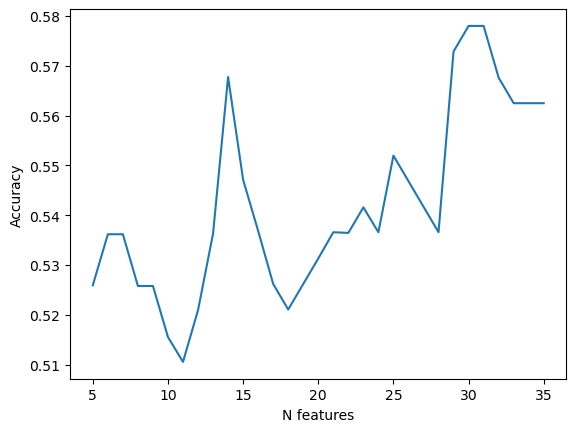

In [262]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [263]:
rfe = RFE(estimator =first_model, n_features_to_select = 30, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGH',
 'AVGD',
 'AVGA',
 'HT_wins',
 'AT_wins',
 'HT_draws',
 'AT_draws',
 'l5_ravg_HTST',
 'l5_ravg_ATST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTdeep',
 'l5_ravg_ATdeep',
 'l5_ravg_HTppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'l5_ravg_HTp',
 'l3_ravg_ATp',
 'diff_points',
 'diff_ATT',
 'diff_MID',
 'diff_DEF',
 'diff_OVA']

In [264]:
X = s1516[featured_columns]
y = s1516[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [265]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [266]:
confusion_matrix(y_test,rfe_pred)

array([[28,  0, 25],
       [11,  2, 32],
       [12,  0, 80]], dtype=int64)

In [268]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.55      0.53      0.54        53
           D       1.00      0.04      0.09        45
           H       0.58      0.87      0.70        92

    accuracy                           0.58       190
   macro avg       0.71      0.48      0.44       190
weighted avg       0.67      0.58      0.51       190



In [269]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [271]:
grid_model.best_params_

{'C': 0.7443803013251681,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'ovr',
 'solver': 'newton-cg'}

In [272]:
confusion_matrix(y_test,grid_model_pred)

array([[26,  0, 27],
       [10,  0, 35],
       [11,  0, 81]], dtype=int64)

In [273]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.55      0.49      0.52        53
           D       0.00      0.00      0.00        45
           H       0.57      0.88      0.69        92

    accuracy                           0.56       190
   macro avg       0.37      0.46      0.40       190
weighted avg       0.43      0.56      0.48       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best accuracy we could get it 0.58 after the implementation of RFE.

Features:
- 'AVGH'
- 'AVGD'
- 'AVGA'
- 'HT_wins'
- 'AT_wins'
- 'HT_draws'
- 'AT_draws'
- 'l5_ravg_HTST'
- 'l5_ravg_ATST'
- 'l5_ravg_HTCR'
- 'l5_ravg_ATCR'
- 'l5_ravg_HTxG'
- 'l5_ravg_ATxG'
- 'l5_ravg_HTxpts'
- 'l5_ravg_ATxpts'
- 'l5_ravg_HTdeep'
- 'l5_ravg_ATdeep'
- 'l5_ravg_HTppda'
- 'l5_htdiff'
- 'l5_atdiff'
- 'avgHTP'
- 'avgATP'
- 'l5_ravg_HTp'
- 'l3_ravg_ATp'
- 'diff_points'
- 'diff_ATT'
- 'diff_MID'
- 'diff_DEF'
- 'diff_OVA'

**Season 1617**

In [34]:
X = s1617.drop('FTR',axis=1)
y = s1617[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [35]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [36]:
confusion_matrix(y_test,base_pred)

array([[12, 37, 12],
       [ 2, 21, 12],
       [ 3, 39, 52]], dtype=int64)

In [37]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.71      0.20      0.31        61
           D       0.22      0.60      0.32        35
           H       0.68      0.55      0.61        94

    accuracy                           0.45       190
   macro avg       0.54      0.45      0.41       190
weighted avg       0.61      0.45      0.46       190



 Clf result : 0.520, +- 0.083 N_features : 5
 Clf result : 0.526, +- 0.065 N_features : 6
 Clf result : 0.546, +- 0.057 N_features : 7
 Clf result : 0.515, +- 0.065 N_features : 8
 Clf result : 0.526, +- 0.075 N_features : 9
 Clf result : 0.520, +- 0.047 N_features : 10
 Clf result : 0.556, +- 0.055 N_features : 11
 Clf result : 0.541, +- 0.056 N_features : 12
 Clf result : 0.541, +- 0.065 N_features : 13
 Clf result : 0.551, +- 0.072 N_features : 14
 Clf result : 0.536, +- 0.059 N_features : 15
 Clf result : 0.567, +- 0.043 N_features : 16
 Clf result : 0.562, +- 0.053 N_features : 17
 Clf result : 0.567, +- 0.051 N_features : 18
 Clf result : 0.582, +- 0.034 N_features : 19
 Clf result : 0.593, +- 0.051 N_features : 20
 Clf result : 0.577, +- 0.049 N_features : 21
 Clf result : 0.562, +- 0.043 N_features : 22
 Clf result : 0.562, +- 0.038 N_features : 23
 Clf result : 0.557, +- 0.032 N_features : 24
 Clf result : 0.562, +- 0.038 N_features : 25
 Clf result : 0.551, +- 0.050 N_feature

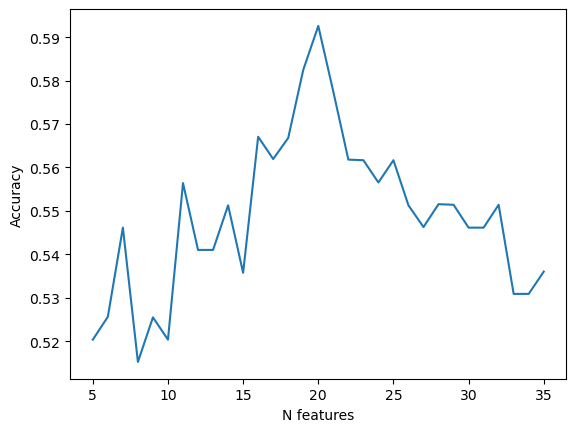

In [19]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [39]:
rfe = RFE(estimator =first_model, n_features_to_select = 20, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGD',
 'AVGA',
 'AT_wins',
 'HT_draws',
 'AT_losses',
 'l5_ravg_HTST',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_ravg_HTppda',
 'l5_htdiff',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'diff_MID',
 'diff_OVA']

In [40]:
X = pd.concat([s1617[featured_columns],s1617['AVGH']],axis=1)
y = s1617[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [42]:
confusion_matrix(y_test,rfe_pred)

array([[17, 35,  9],
       [ 4, 21, 10],
       [ 5, 42, 47]], dtype=int64)

In [43]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.65      0.28      0.39        61
           D       0.21      0.60      0.32        35
           H       0.71      0.50      0.59        94

    accuracy                           0.45       190
   macro avg       0.53      0.46      0.43       190
weighted avg       0.60      0.45      0.47       190



In [44]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [45]:
grid_model.best_params_

{'C': 0.03888155180308085,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [46]:
confusion_matrix(y_test,grid_model_pred)

array([[29, 28,  4],
       [ 7, 20,  8],
       [ 8, 44, 42]], dtype=int64)

In [47]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.66      0.48      0.55        61
           D       0.22      0.57      0.31        35
           H       0.78      0.45      0.57        94

    accuracy                           0.48       190
   macro avg       0.55      0.50      0.48       190
weighted avg       0.64      0.48      0.52       190



Best accuracy we could get for that season is 0,48 after implementing GridSearchCV.

Hyperparameters:
- 'C': 0.03888155180308085
- 'class_weight': 'balanced'
- 'fit_intercept': False
- 'multi_class': 'multinomial'
- 'solver': 'newton-cg'

Features:
- 'AVGD'
- 'AVGA'
- 'AT_wins'
- 'HT_draws'
- 'AT_losses'
- 'l5_ravg_HTST'
- 'l5_ravg_HTCR'
- 'l5_ravg_ATCR'
- 'l5_ravg_HTxG'
- 'l5_ravg_ATxG'
- 'l5_ravg_HTxpts'
- 'l5_ravg_ATxpts'
- 'l5_ravg_HTppda'
- 'l5_htdiff'
- 'l5_atdiff'
- 'avgHTP'
- 'avgATP'
- 'diff_MID'
- 'diff_OVA'

**Season 1718**

In [48]:
X = s1718.drop('FTR',axis=1)
y = s1718[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [50]:
confusion_matrix(y_test,base_pred)

array([[33,  1, 19],
       [13,  3, 28],
       [28,  9, 56]], dtype=int64)

In [51]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.45      0.62      0.52        53
           D       0.23      0.07      0.11        44
           H       0.54      0.60      0.57        93

    accuracy                           0.48       190
   macro avg       0.41      0.43      0.40       190
weighted avg       0.44      0.48      0.45       190



 Clf result : 0.484, +- 0.055 N_features : 5
 Clf result : 0.531, +- 0.078 N_features : 6
 Clf result : 0.552, +- 0.052 N_features : 7
 Clf result : 0.537, +- 0.079 N_features : 8
 Clf result : 0.547, +- 0.059 N_features : 9
 Clf result : 0.542, +- 0.059 N_features : 10
 Clf result : 0.515, +- 0.089 N_features : 11
 Clf result : 0.504, +- 0.085 N_features : 12
 Clf result : 0.494, +- 0.093 N_features : 13
 Clf result : 0.473, +- 0.094 N_features : 14
 Clf result : 0.479, +- 0.081 N_features : 15
 Clf result : 0.479, +- 0.090 N_features : 16
 Clf result : 0.489, +- 0.075 N_features : 17
 Clf result : 0.494, +- 0.076 N_features : 18
 Clf result : 0.489, +- 0.083 N_features : 19
 Clf result : 0.489, +- 0.083 N_features : 20
 Clf result : 0.489, +- 0.080 N_features : 21
 Clf result : 0.505, +- 0.071 N_features : 22
 Clf result : 0.500, +- 0.079 N_features : 23
 Clf result : 0.505, +- 0.072 N_features : 24
 Clf result : 0.489, +- 0.065 N_features : 25
 Clf result : 0.495, +- 0.063 N_feature

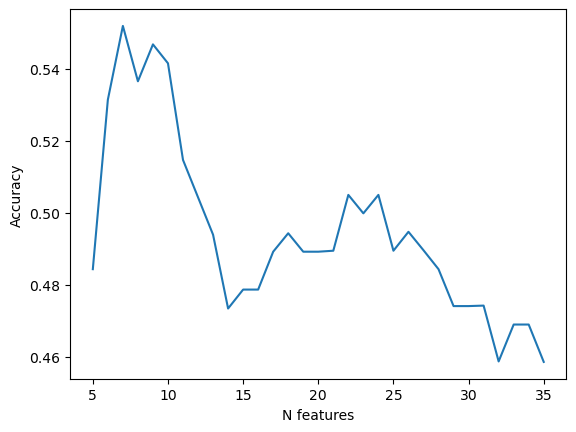

In [52]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [53]:
rfe = RFE(estimator =first_model, n_features_to_select = 9, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['AVGH',
 'AVGD',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'avgHTP',
 'avgATP']

In [54]:
X = pd.concat([s1718[featured_columns],s1718['round']],axis=1)
y = s1718[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [55]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [56]:
confusion_matrix(y_test,rfe_pred)

array([[23,  0, 30],
       [14,  0, 30],
       [18,  0, 75]], dtype=int64)

In [57]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.42      0.43      0.43        53
           D       0.00      0.00      0.00        44
           H       0.56      0.81      0.66        93

    accuracy                           0.52       190
   macro avg       0.32      0.41      0.36       190
weighted avg       0.39      0.52      0.44       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [59]:
grid_model.best_params_

{'C': 2.424462017082326,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [60]:
confusion_matrix(y_test,grid_model_pred)

array([[30,  0, 23],
       [14,  0, 30],
       [21,  0, 72]], dtype=int64)

In [61]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.46      0.57      0.51        53
           D       0.00      0.00      0.00        44
           H       0.58      0.77      0.66        93

    accuracy                           0.54       190
   macro avg       0.35      0.45      0.39       190
weighted avg       0.41      0.54      0.47       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best accuracy we could get is 0,54 after performing GridSearchCV.

Hyperparameters:
- 'C': 2.424462017082326
- 'class_weight': None
- 'fit_intercept': True
- 'multi_class': 'multinomial'
- 'solver': 'newton-cg'

Features:
- 'AVGH'
- 'AVGD'
- 'l5_ravg_HTCR'
- 'l5_ravg_ATCR'
- 'l5_ravg_HTxG'
- 'l5_ravg_HTxpts'
- 'l5_ravg_ATxpts'
- 'avgHTP'
- 'avgATP'

**Season 18/19**

In [62]:
X = s1819.drop('FTR',axis=1)
y = s1819[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [64]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [65]:
confusion_matrix(y_test,base_pred)

array([[ 9, 20, 21],
       [ 8, 16, 24],
       [17, 20, 55]], dtype=int64)

In [66]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.26      0.18      0.21        50
           D       0.29      0.33      0.31        48
           H       0.55      0.60      0.57        92

    accuracy                           0.42       190
   macro avg       0.37      0.37      0.36       190
weighted avg       0.41      0.42      0.41       190



 Clf result : 0.422, +- 0.051 N_features : 5
 Clf result : 0.412, +- 0.056 N_features : 6
 Clf result : 0.397, +- 0.060 N_features : 7
 Clf result : 0.412, +- 0.047 N_features : 8
 Clf result : 0.402, +- 0.046 N_features : 9
 Clf result : 0.387, +- 0.034 N_features : 10
 Clf result : 0.453, +- 0.061 N_features : 11
 Clf result : 0.443, +- 0.063 N_features : 12
 Clf result : 0.459, +- 0.045 N_features : 13
 Clf result : 0.448, +- 0.080 N_features : 14
 Clf result : 0.454, +- 0.067 N_features : 15
 Clf result : 0.459, +- 0.037 N_features : 16
 Clf result : 0.448, +- 0.053 N_features : 17
 Clf result : 0.443, +- 0.054 N_features : 18
 Clf result : 0.453, +- 0.065 N_features : 19
 Clf result : 0.453, +- 0.061 N_features : 20
 Clf result : 0.448, +- 0.058 N_features : 21
 Clf result : 0.453, +- 0.062 N_features : 22
 Clf result : 0.448, +- 0.078 N_features : 23
 Clf result : 0.448, +- 0.090 N_features : 24
 Clf result : 0.453, +- 0.085 N_features : 25
 Clf result : 0.433, +- 0.080 N_feature

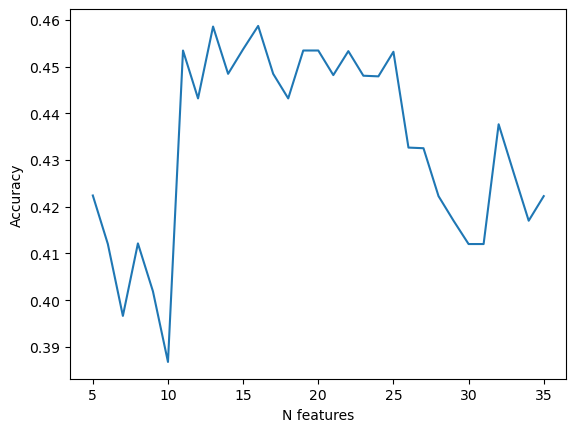

In [67]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [68]:
rfe = RFE(estimator =first_model, n_features_to_select = 16, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['round',
 'AVGD',
 'HT_draws',
 'AT_draws',
 'AT_losses',
 'l5_ravg_HTCR',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_atdiff',
 'avgHTP',
 'avgATP',
 'diff_MID',
 'diff_OVA']

In [69]:
X = s1819[featured_columns]
y = s1819[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [70]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [71]:
confusion_matrix(y_test,rfe_pred)

array([[ 9, 16, 25],
       [ 5, 16, 27],
       [11, 17, 64]], dtype=int64)

In [72]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.36      0.18      0.24        50
           D       0.33      0.33      0.33        48
           H       0.55      0.70      0.62        92

    accuracy                           0.47       190
   macro avg       0.41      0.40      0.40       190
weighted avg       0.44      0.47      0.44       190



In [81]:
parameters = {'C': np.logspace(-3,3,20), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [82]:
grid_model.best_params_

{'C': 1000.0,
 'class_weight': None,
 'fit_intercept': False,
 'multi_class': 'ovr',
 'solver': 'newton-cg'}

In [83]:
confusion_matrix(y_test,grid_model_pred)

array([[30, 12,  8],
       [16, 18, 14],
       [43, 18, 31]], dtype=int64)

In [84]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.34      0.60      0.43        50
           D       0.38      0.38      0.38        48
           H       0.58      0.34      0.43        92

    accuracy                           0.42       190
   macro avg       0.43      0.44      0.41       190
weighted avg       0.47      0.42      0.42       190



Best accuracy we could get is 0,47 after implementing RFE.

Features:
- 'AVGD'
- 'HT_draws'
- 'AT_draws'
- 'AT_losses'
- 'l5_ravg_HTCR'
- 'l5_ravg_ATCR'
- 'l5_ravg_HTxG'
- 'l5_ravg_ATxG'
- 'l5_ravg_HTxpts'
- 'l5_ravg_ATxpts'
- 'l5_atdiff'
- 'avgHTP'
- 'avgATP'
- 'diff_MID'
- 'diff_OVA'

**Season 19/20**

In [117]:
X = s1920.drop('FTR',axis=1)
y = s1920[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [87]:
first_model.fit(scaled_X_train,y_train.values.ravel())
base_pred = first_model.predict(scaled_X_test)

In [88]:
confusion_matrix(y_test,base_pred)

array([[ 2, 46,  4],
       [ 0, 40, 10],
       [ 1, 56, 31]], dtype=int64)

In [89]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           A       0.67      0.04      0.07        52
           D       0.28      0.80      0.42        50
           H       0.69      0.35      0.47        88

    accuracy                           0.38       190
   macro avg       0.55      0.40      0.32       190
weighted avg       0.58      0.38      0.35       190



 Clf result : 0.536, +- 0.035 N_features : 5
 Clf result : 0.521, +- 0.023 N_features : 6
 Clf result : 0.521, +- 0.023 N_features : 7
 Clf result : 0.521, +- 0.023 N_features : 8
 Clf result : 0.521, +- 0.032 N_features : 9
 Clf result : 0.511, +- 0.033 N_features : 10
 Clf result : 0.526, +- 0.028 N_features : 11
 Clf result : 0.510, +- 0.017 N_features : 12
 Clf result : 0.505, +- 0.019 N_features : 13
 Clf result : 0.510, +- 0.033 N_features : 14
 Clf result : 0.510, +- 0.033 N_features : 15
 Clf result : 0.505, +- 0.038 N_features : 16
 Clf result : 0.521, +- 0.044 N_features : 17
 Clf result : 0.510, +- 0.038 N_features : 18
 Clf result : 0.510, +- 0.038 N_features : 19
 Clf result : 0.500, +- 0.049 N_features : 20
 Clf result : 0.510, +- 0.060 N_features : 21
 Clf result : 0.510, +- 0.060 N_features : 22
 Clf result : 0.510, +- 0.043 N_features : 23
 Clf result : 0.510, +- 0.043 N_features : 24
 Clf result : 0.495, +- 0.054 N_features : 25
 Clf result : 0.495, +- 0.054 N_feature

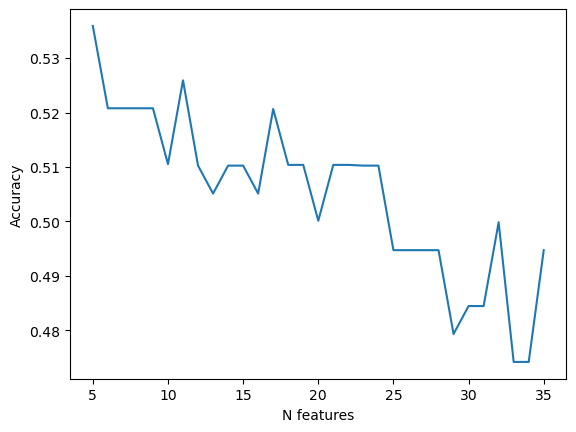

In [90]:
acc_results = []
n_features = []

for i in range(5, 36):
    rfe = RFE(estimator =first_model, n_features_to_select = i, step=1)
    rfe.fit(X,y.drop('round',axis=1).values.ravel())
    X_temp = rfe.transform(X)

    np.random.seed(101)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,y.drop('round',axis=1).values.ravel(),test_size = 0.41,
                                                       shuffle=False)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    scores = cross_val_score(first_model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [118]:
rfe = RFE(estimator =first_model, n_features_to_select = 11, step=1)
rfe.fit(X,y.drop('round',axis=1).values.ravel())

featured_columns = pd.DataFrame(rfe.support_,
                            index = X.columns,
                            columns=['is_in'])

featured_columns = featured_columns[featured_columns.is_in == True].index.tolist()

featured_columns

['AVGH',
 'AVGD',
 'l5_ravg_ATST',
 'l5_ravg_ATCR',
 'l5_ravg_HTxG',
 'l5_ravg_ATxG',
 'l5_ravg_HTxpts',
 'l5_ravg_ATxpts',
 'l5_htdiff',
 'avgHTP',
 'avgATP']

In [119]:
X = pd.concat([s1920[featured_columns],s1920['round']],axis=1)
y = s1920[['FTR','round']]

X_train = X[X['round']==1].drop('round',axis=1)
X_test = X[X['round']==2].drop('round',axis=1)

y_train = y[y['round']==1].drop('round',axis=1)
y_test = y[y['round']==2].drop('round',axis=1)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [120]:
first_model.fit(scaled_X_train,y_train.values.ravel())
rfe_pred = first_model.predict(scaled_X_test)

In [121]:
confusion_matrix(y_test,rfe_pred)

array([[17,  0, 35],
       [ 8,  0, 42],
       [10,  0, 78]], dtype=int64)

In [122]:
print(classification_report(y_test,rfe_pred))

              precision    recall  f1-score   support

           A       0.49      0.33      0.39        52
           D       0.00      0.00      0.00        50
           H       0.50      0.89      0.64        88

    accuracy                           0.50       190
   macro avg       0.33      0.40      0.34       190
weighted avg       0.37      0.50      0.40       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
parameters = {'C': np.logspace(-5,5,40), 'multi_class':['ovr','multinomial'], 
              'fit_intercept':[True, False], 'solver' :['newton-cg','saga','sag', 'lbfgs'], 'class_weight' : [None,'balanced']}

grid_model = GridSearchCV(first_model,param_grid=parameters,scoring='accuracy')

grid_model.fit(scaled_X_train,y_train.values.ravel())
grid_model_pred = grid_model.predict(scaled_X_test)

In [124]:
grid_model.best_params_

{'C': 0.4124626382901348,
 'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'multinomial',
 'solver': 'newton-cg'}

In [125]:
confusion_matrix(y_test,grid_model_pred)

array([[14,  0, 38],
       [ 5,  0, 45],
       [ 6,  0, 82]], dtype=int64)

In [126]:
print(classification_report(y_test,grid_model_pred))

              precision    recall  f1-score   support

           A       0.56      0.27      0.36        52
           D       0.00      0.00      0.00        50
           H       0.50      0.93      0.65        88

    accuracy                           0.51       190
   macro avg       0.35      0.40      0.34       190
weighted avg       0.38      0.51      0.40       190



C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best accuracy we could get is 0,51 after implementing GridSearcCV.

Hyperparameters:
- 'C': 0.4124626382901348
- 'class_weight': None
- 'fit_intercept': True
- 'multi_class': 'multinomial'
- 'solver': 'newton-cg'

Features
- 'AVGH'
- 'AVGD'
- 'l5_ravg_ATST'
- 'l5_ravg_ATCR'
- 'l5_ravg_HTxG'
- 'l5_ravg_ATxG'
- 'l5_ravg_HTxpts'
- 'l5_ravg_ATxpts'
- 'l5_htdiff'
- 'avgHTP'
- 'avgATP'